In [1]:
import dealwithpath
from TDQT import *
import dill

/eos/home-i00/d/drousso/SWAN_projects/TDQT_NEW/Examples/../TDQT/device_defn.py:112: RuntimeWarning: divide by zero encountered in divide
  Target_P0ss[:size_lead_L,:size_lead_L]=np.diag(expit(- (E_L - mu_L) / (kB * T_L)))
/eos/home-i00/d/drousso/SWAN_projects/TDQT_NEW/Examples/../TDQT/device_defn.py:113: RuntimeWarning: divide by zero encountered in divide
  Target_P0ss[-size_lead_R:,-size_lead_R:]=np.diag(expit(- (E_R - mu_R) / (kB * T_R)))
/eos/home-i00/d/drousso/SWAN_projects/TDQT_NEW/Examples/../TDQT/device_defn.py:114: RuntimeWarning: divide by zero encountered in divide
  Target_P0ss[size_lead_L:size_lead_L+size_EM,size_lead_L:size_lead_L+size_EM]=np.diag(expit(- (E_EM - mu_EM) / (kB * T_EM)))


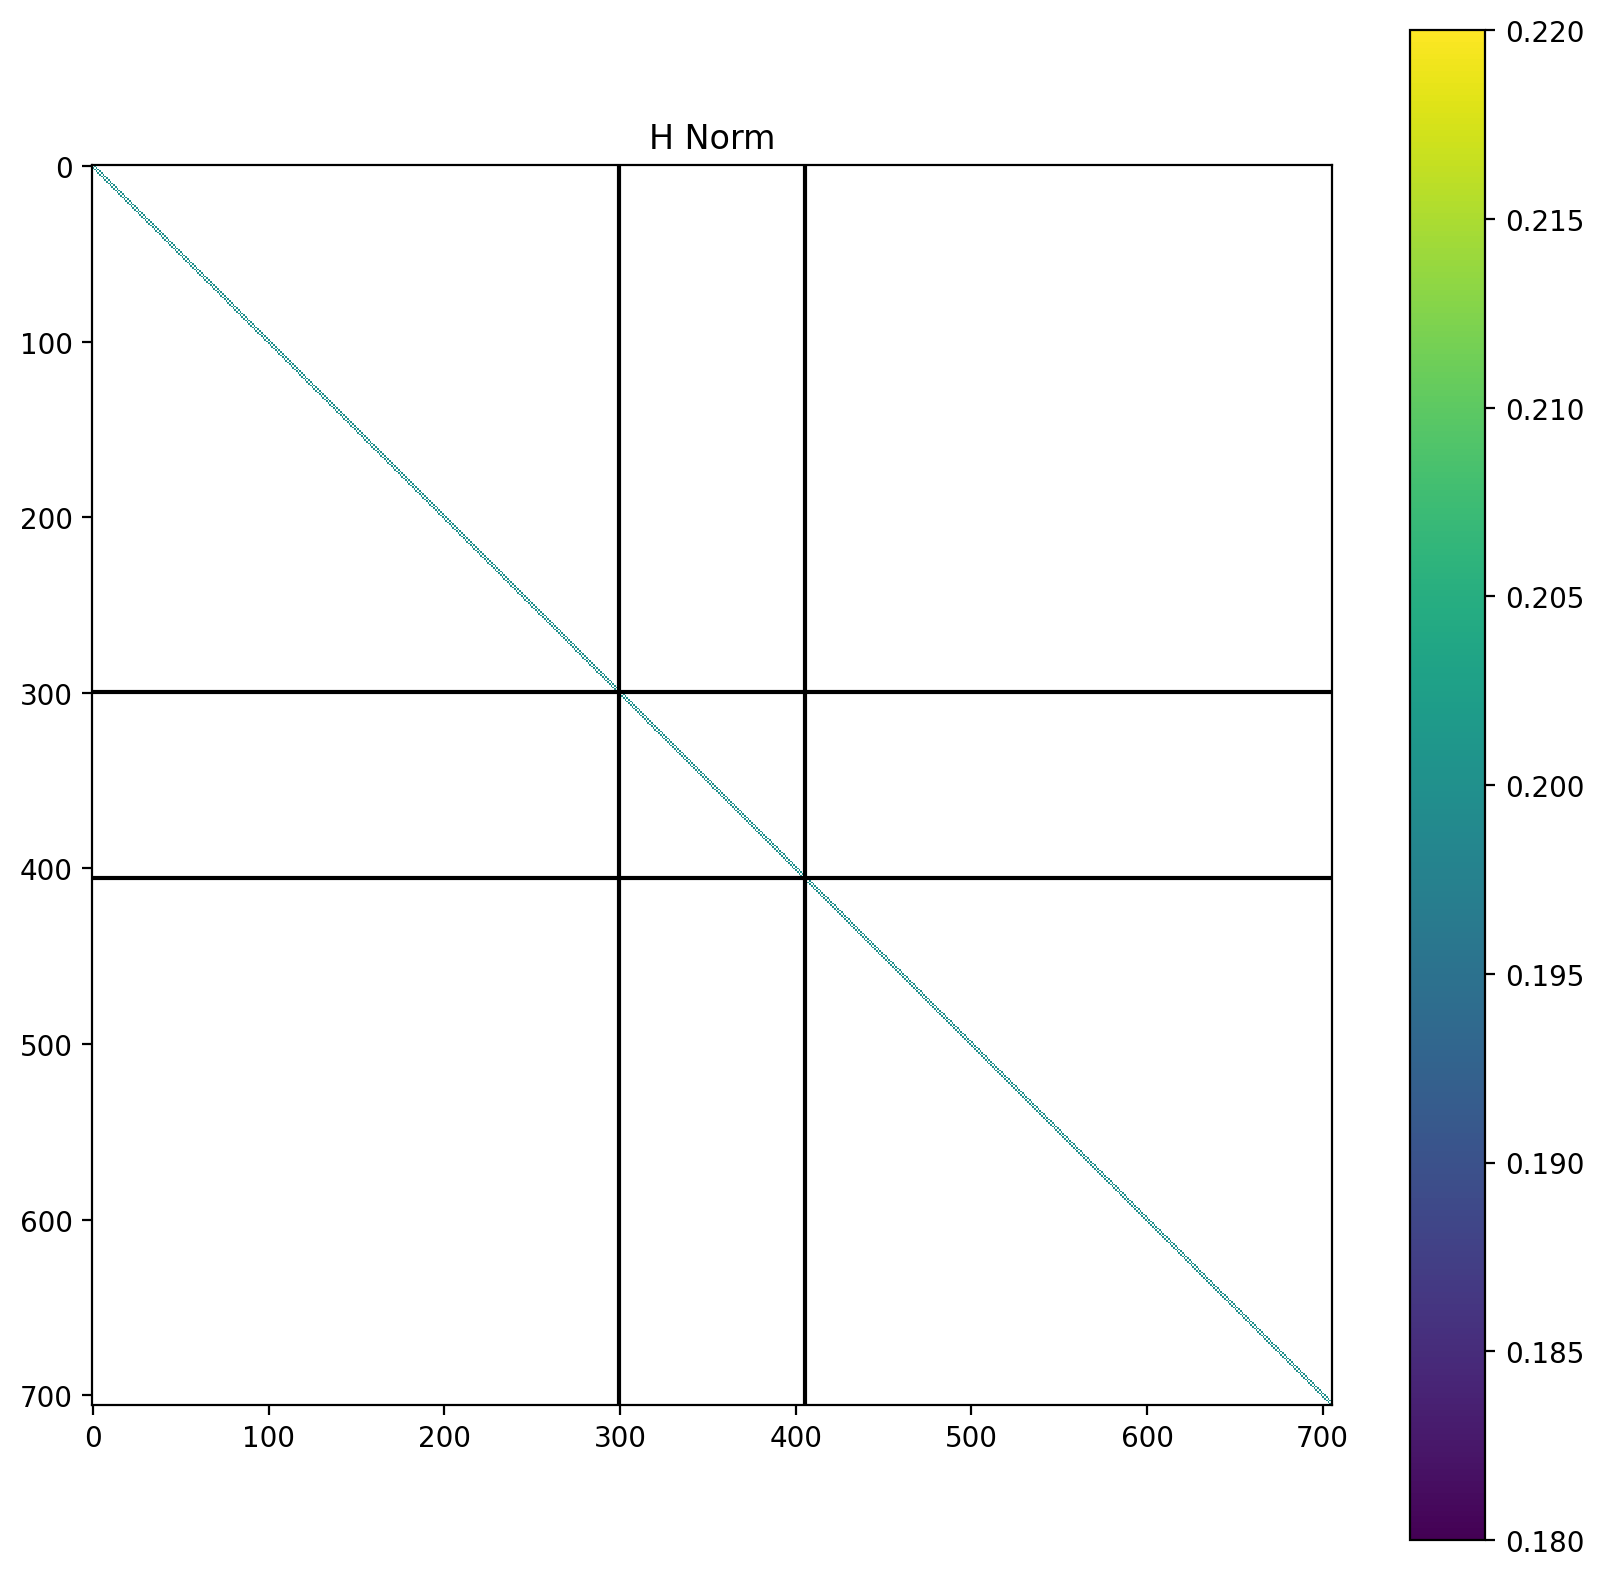

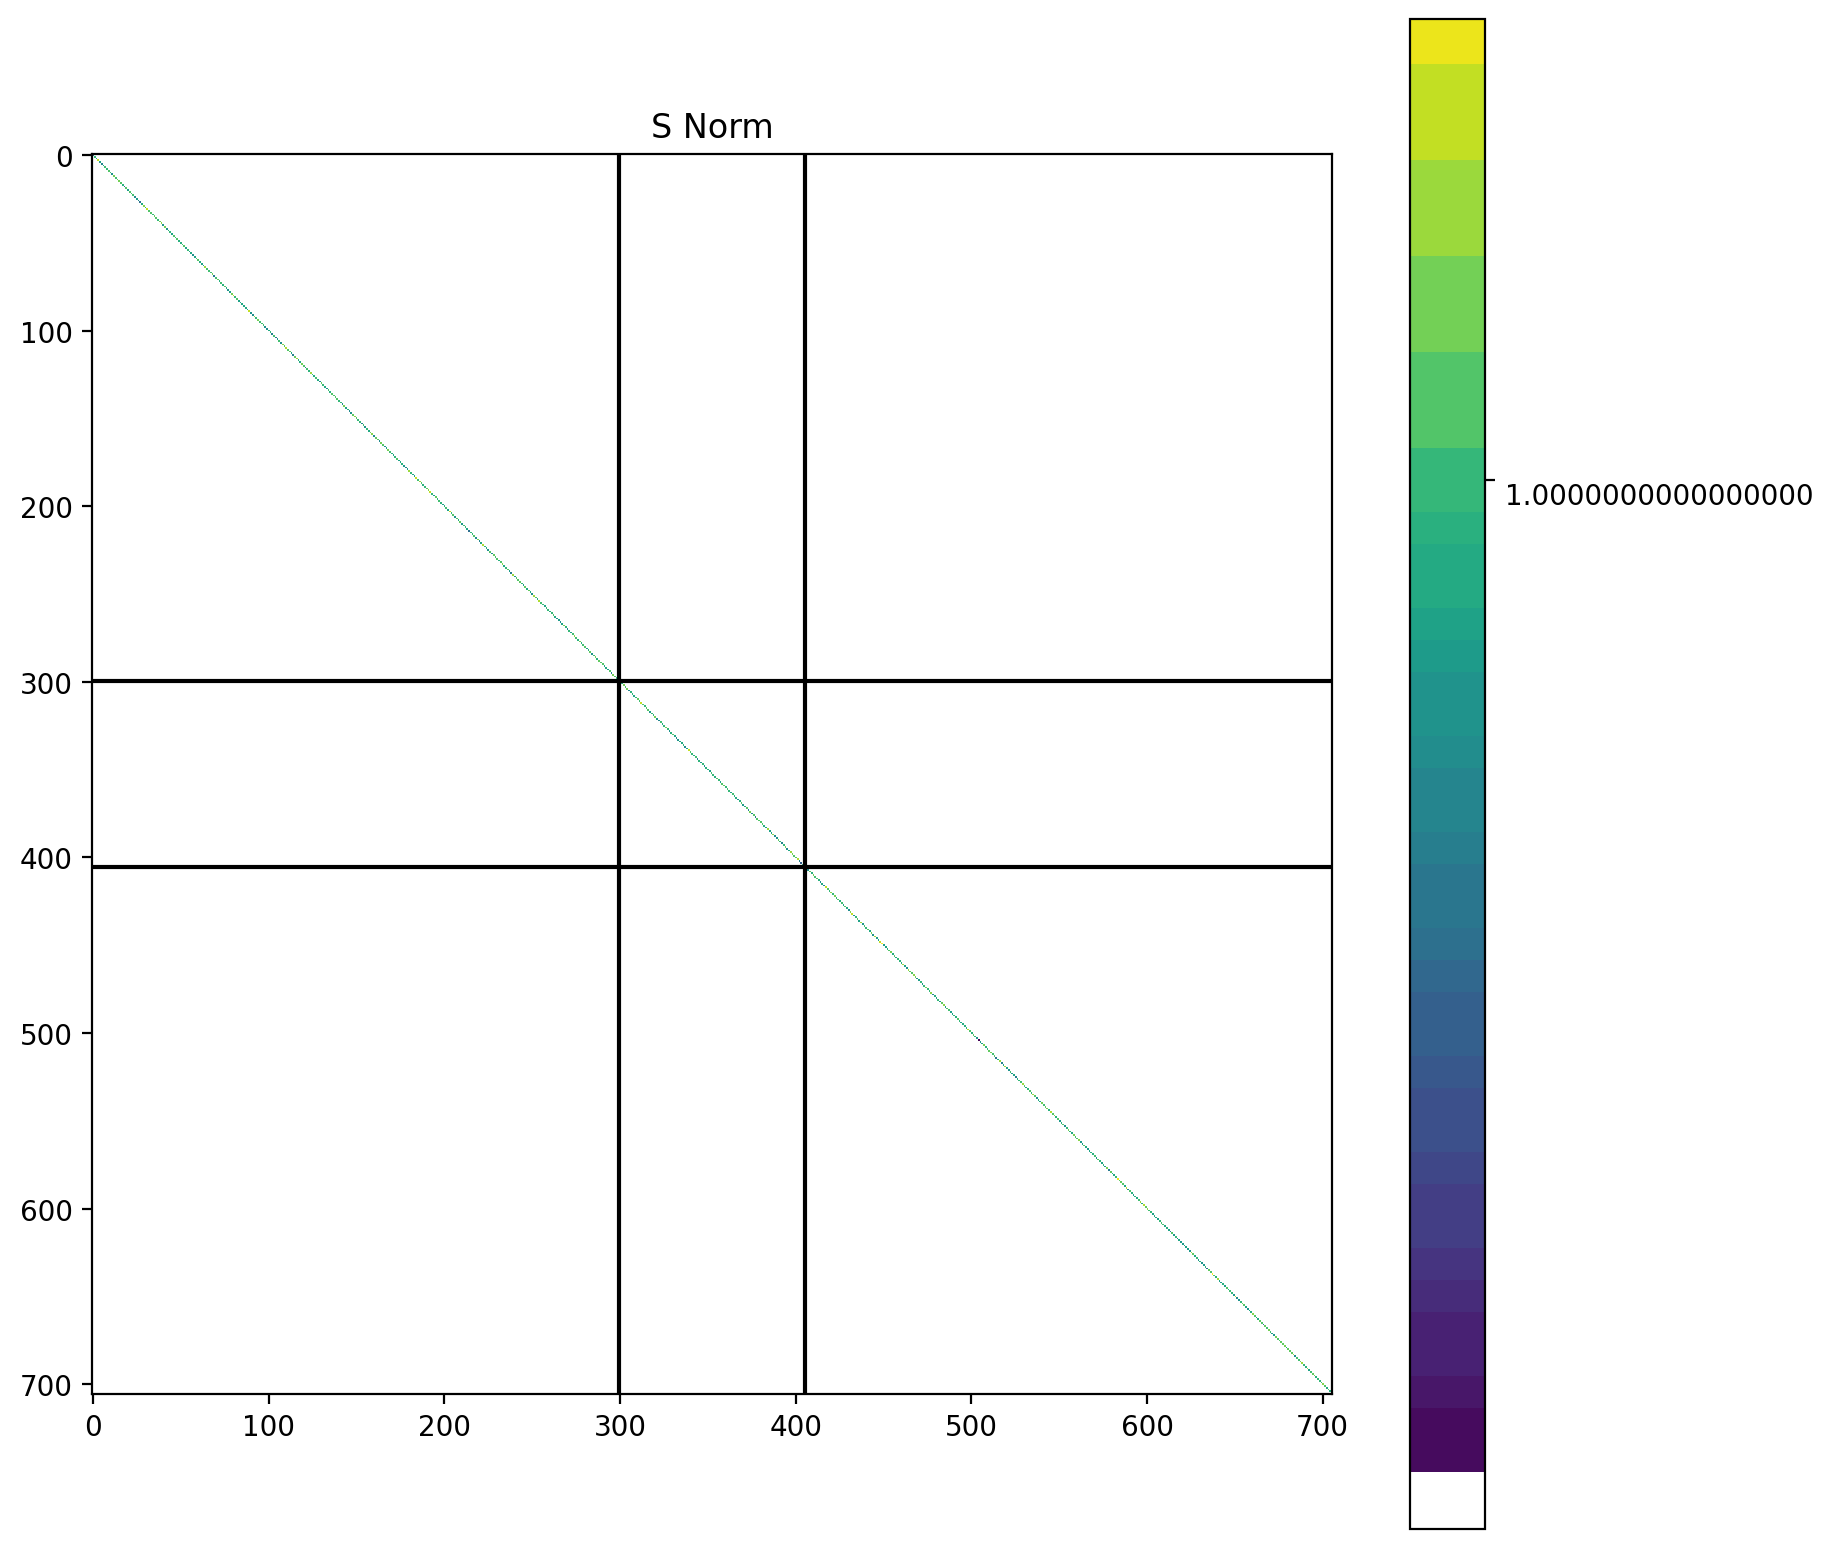

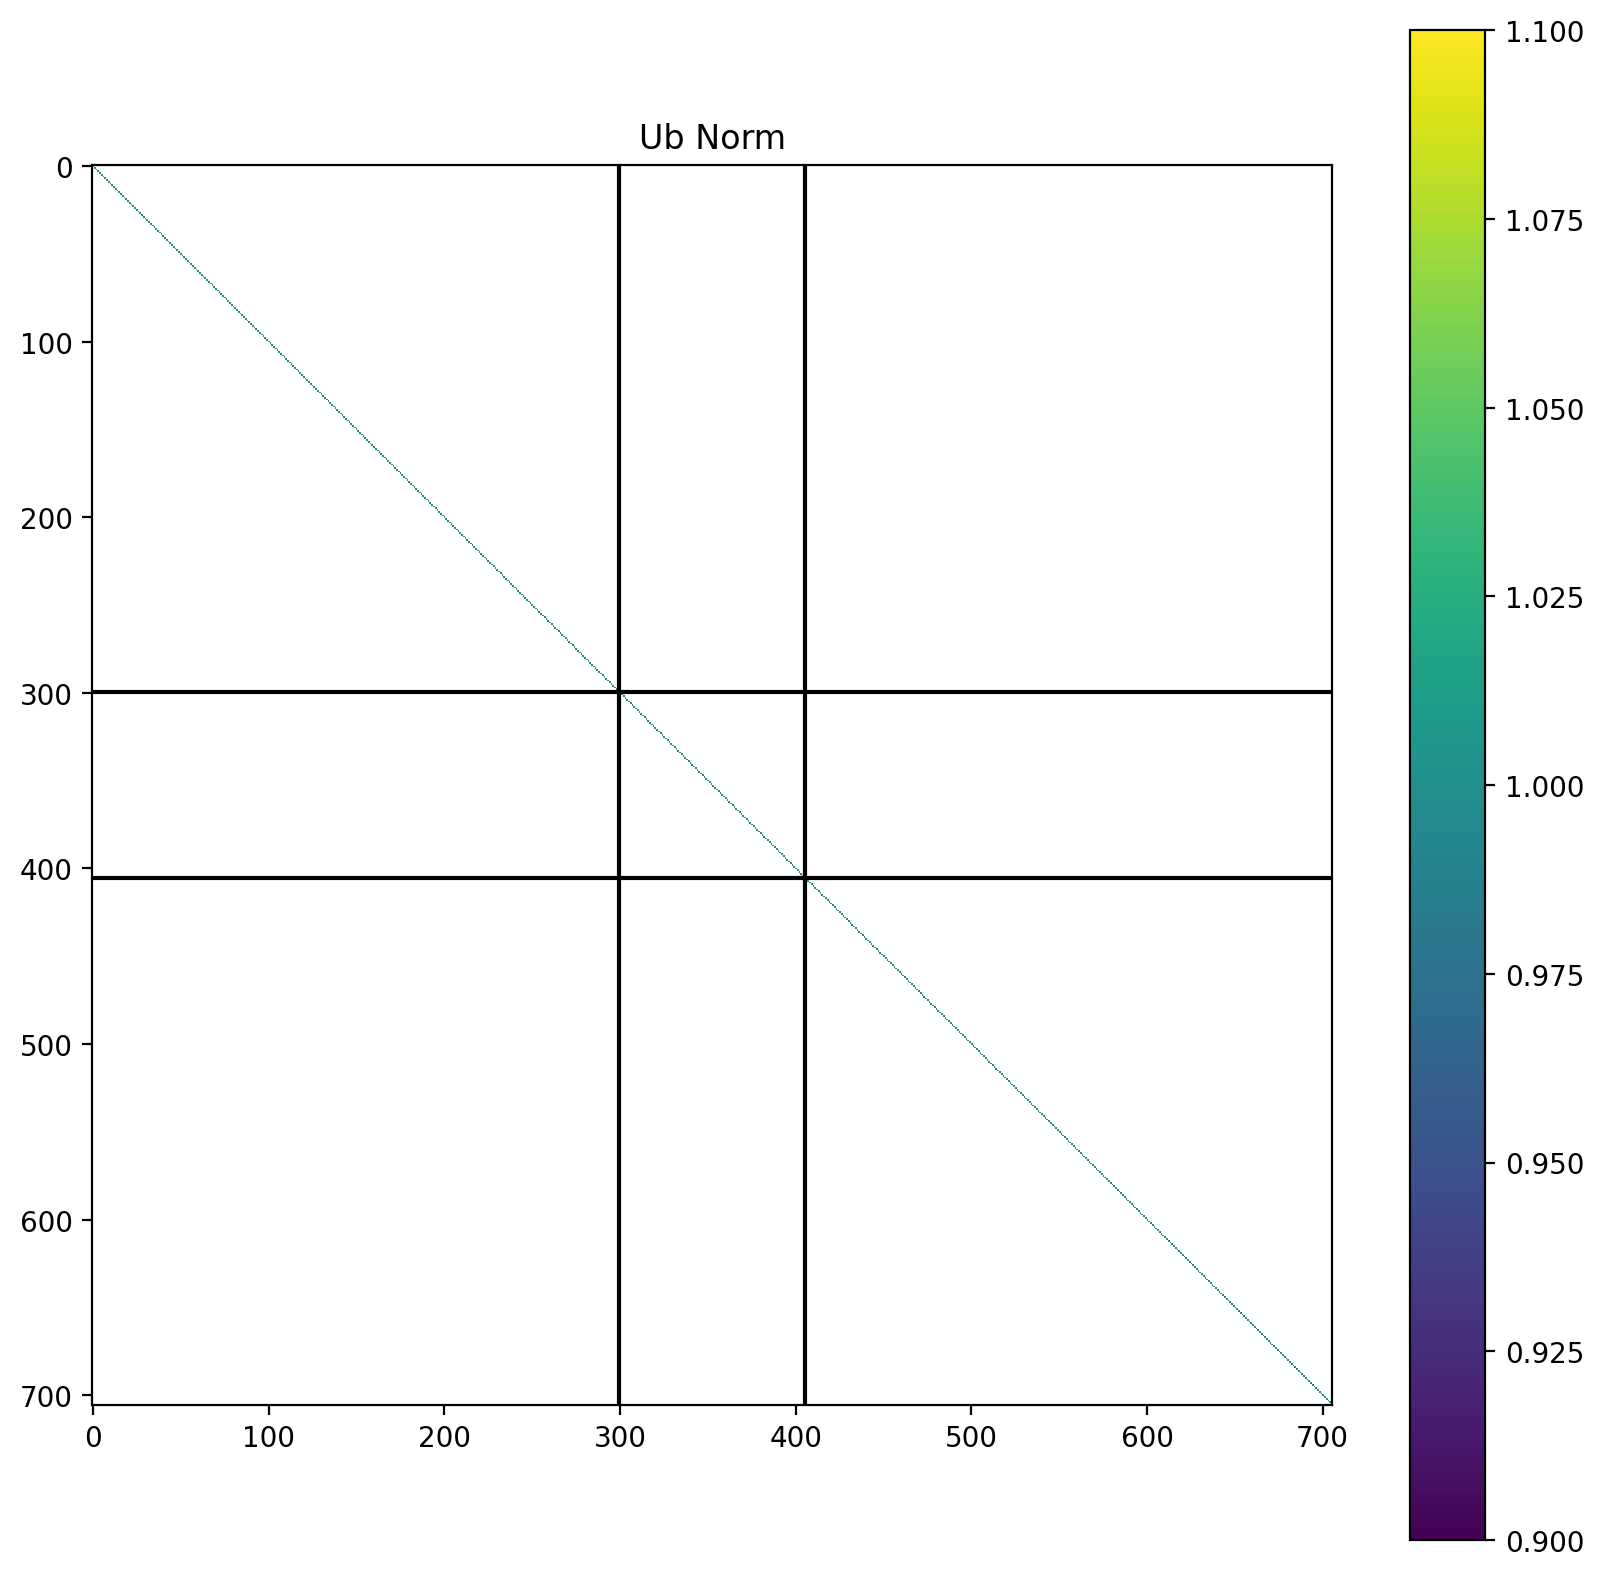

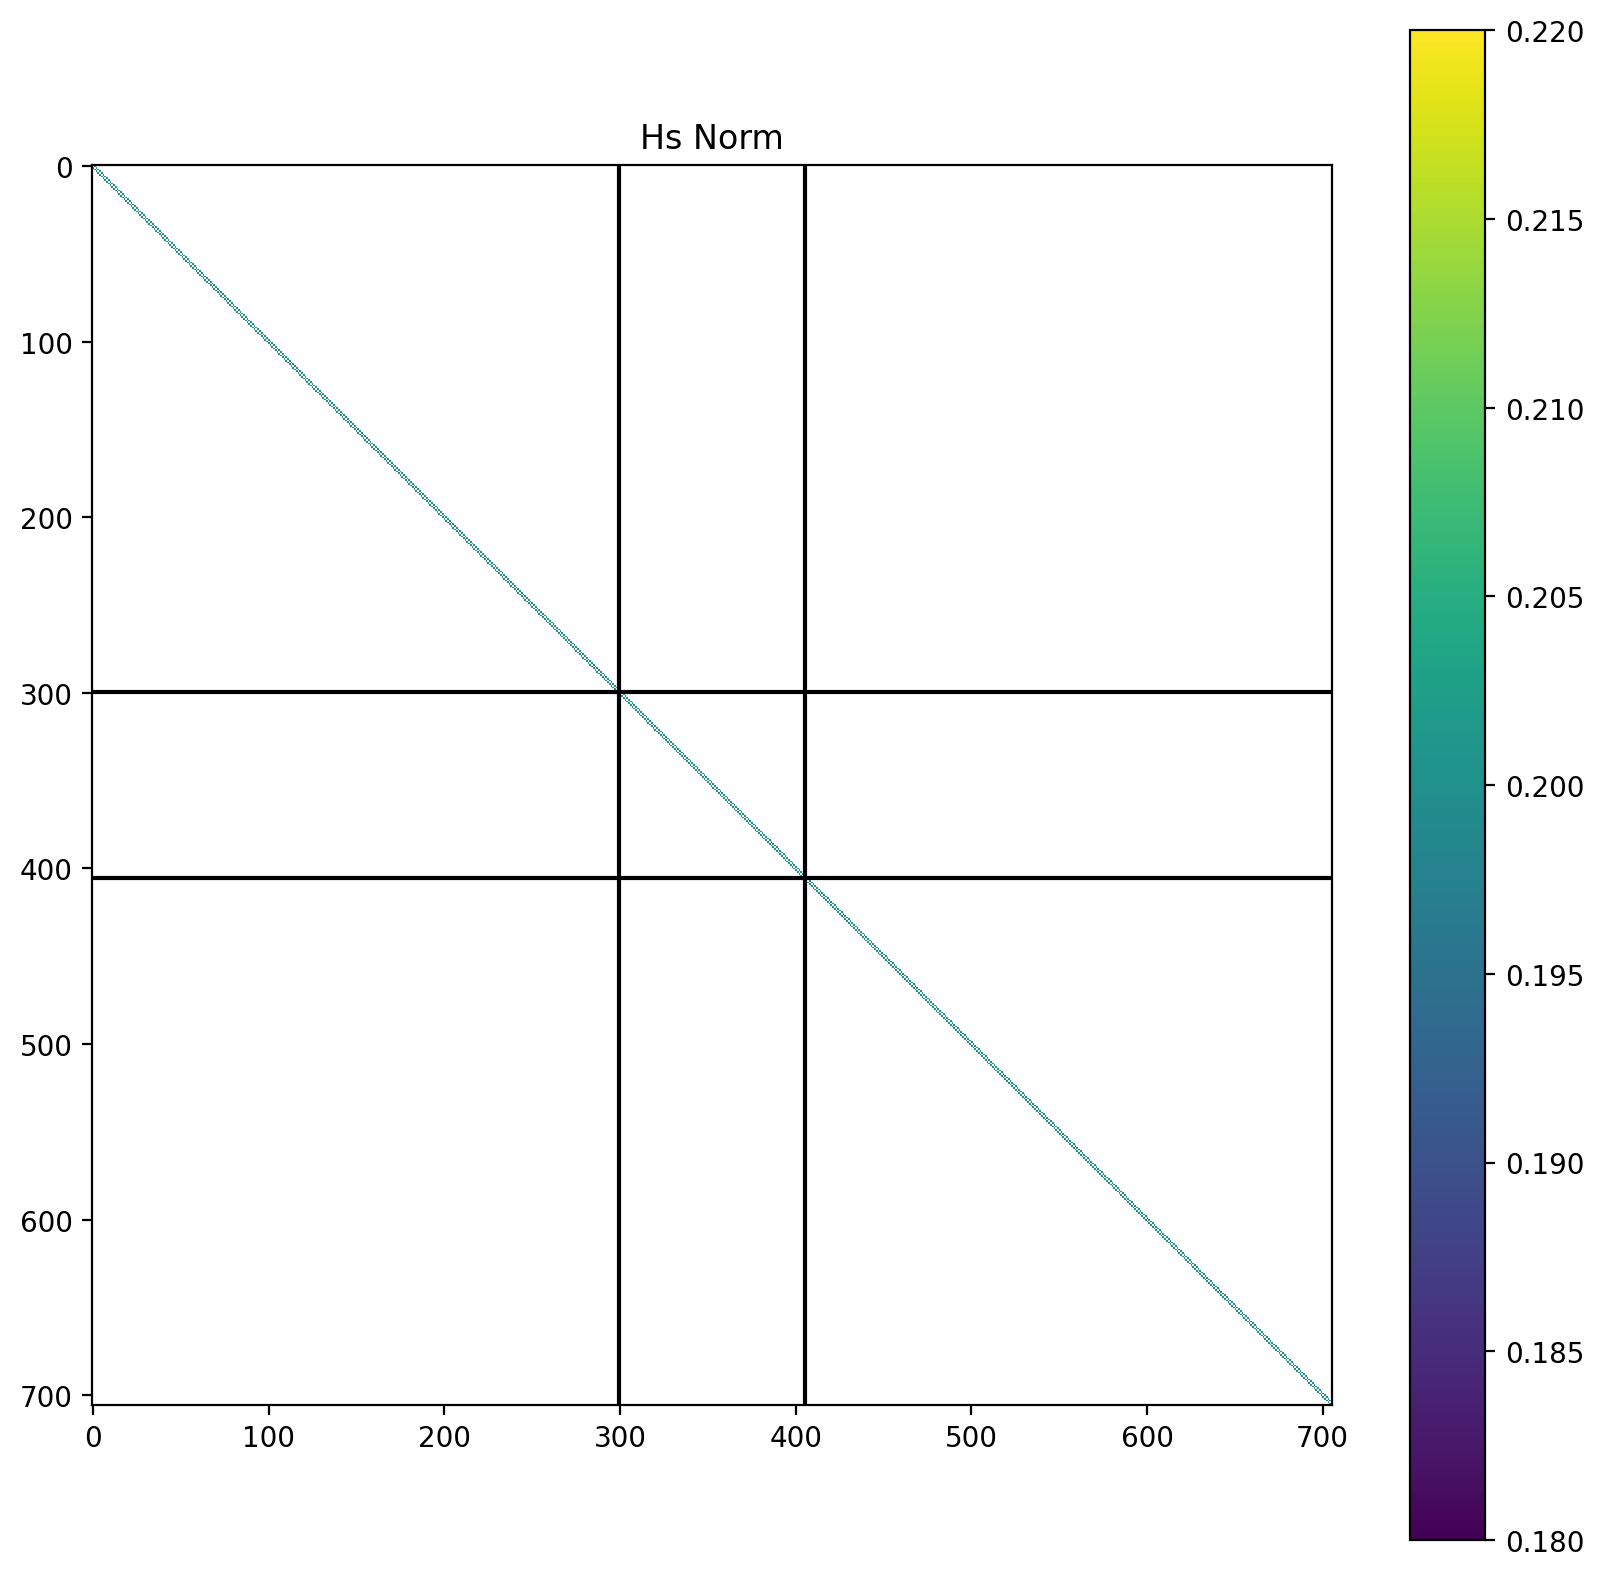

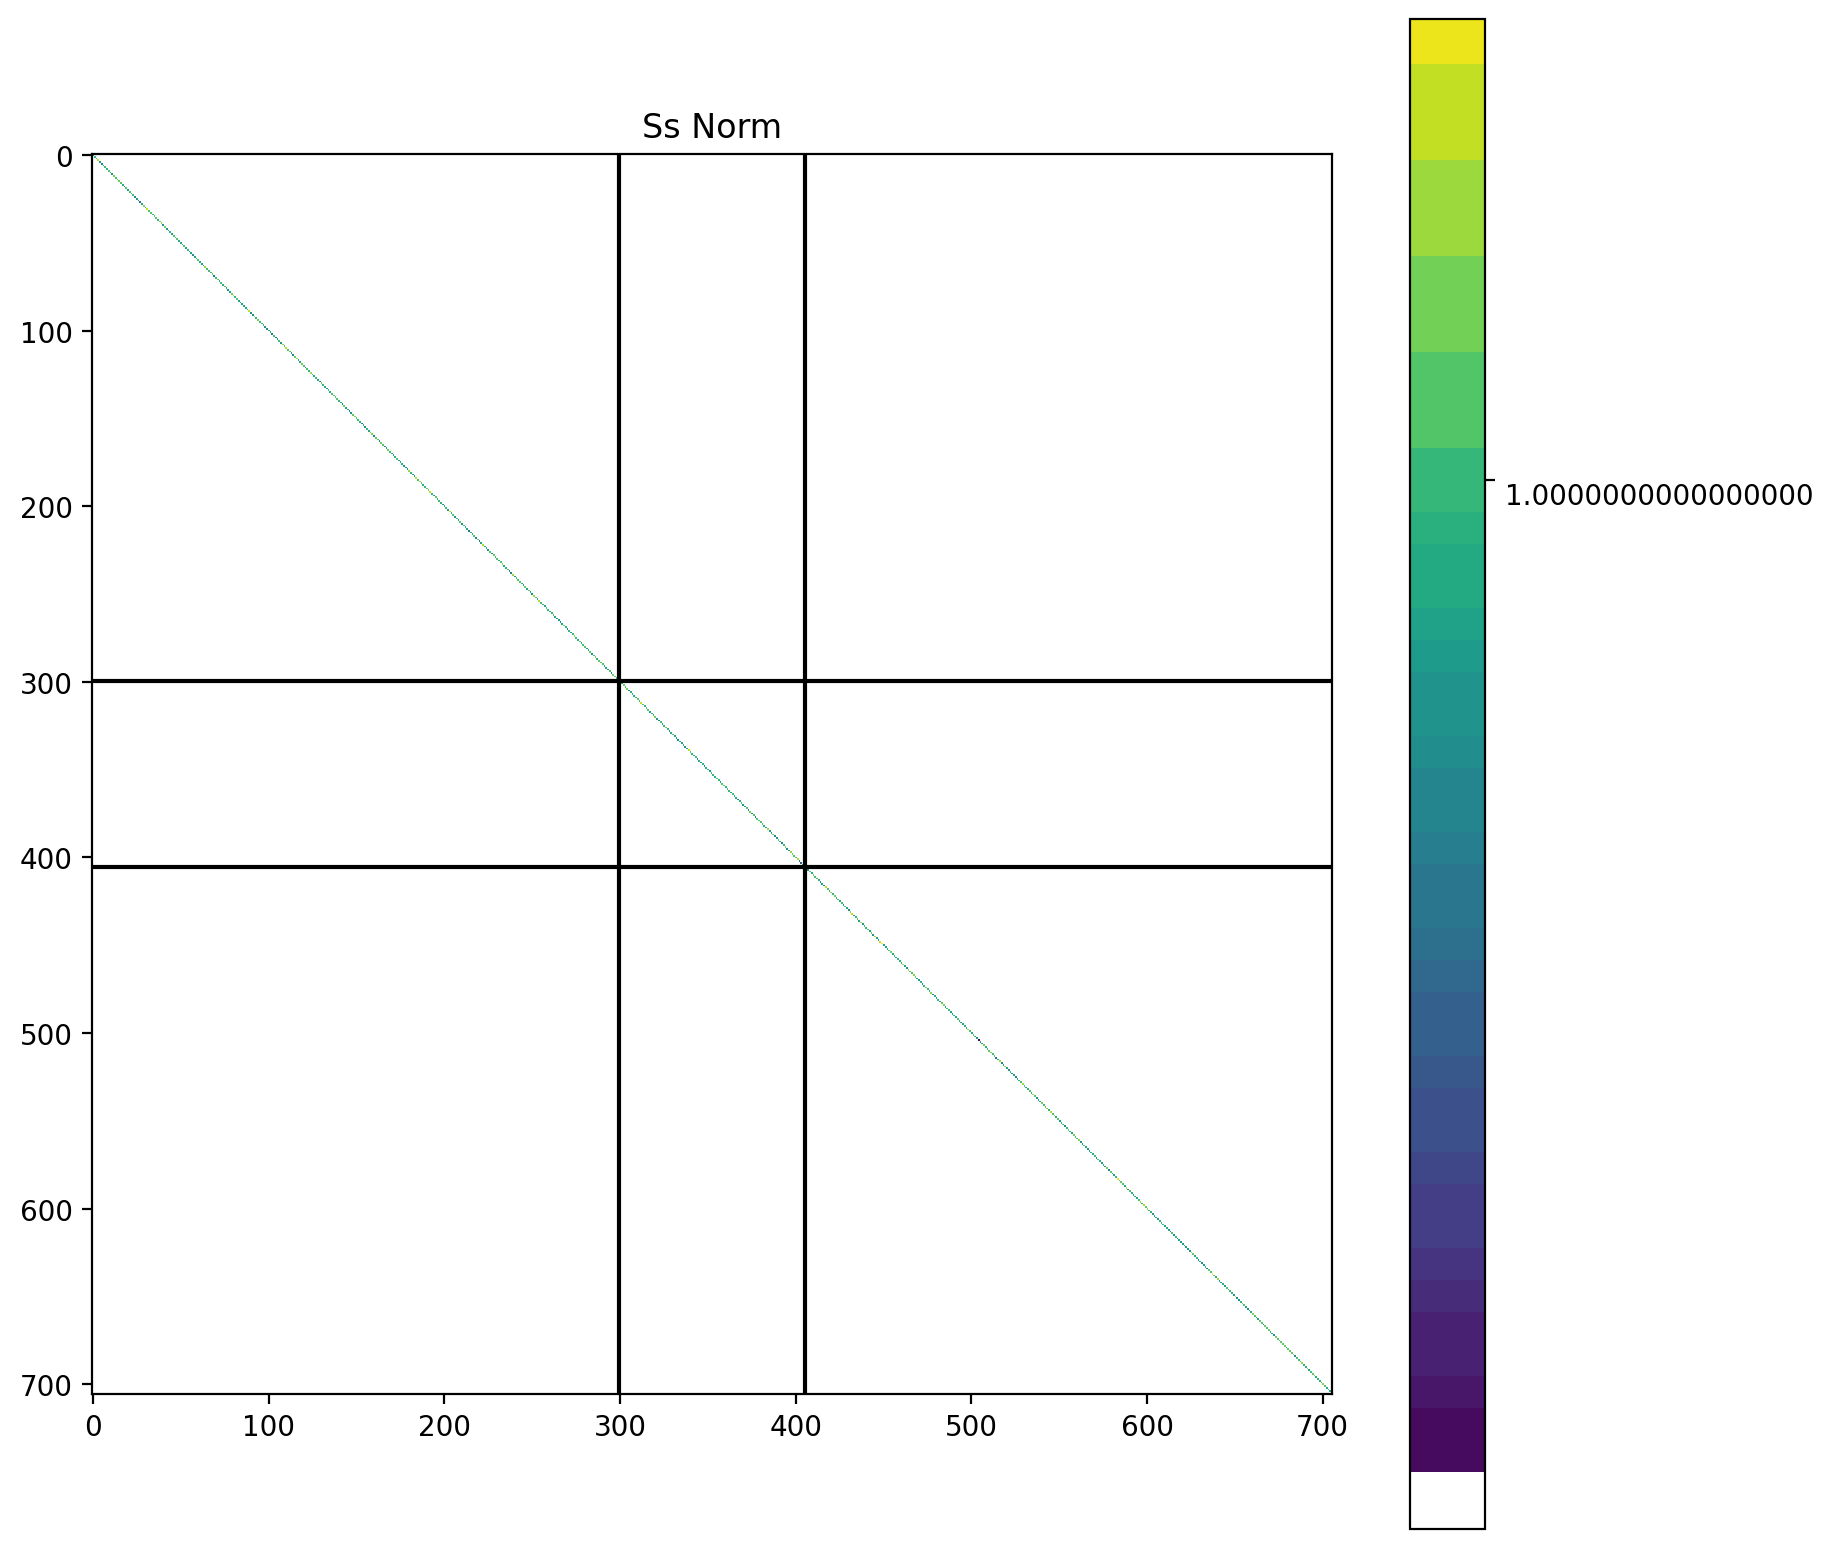

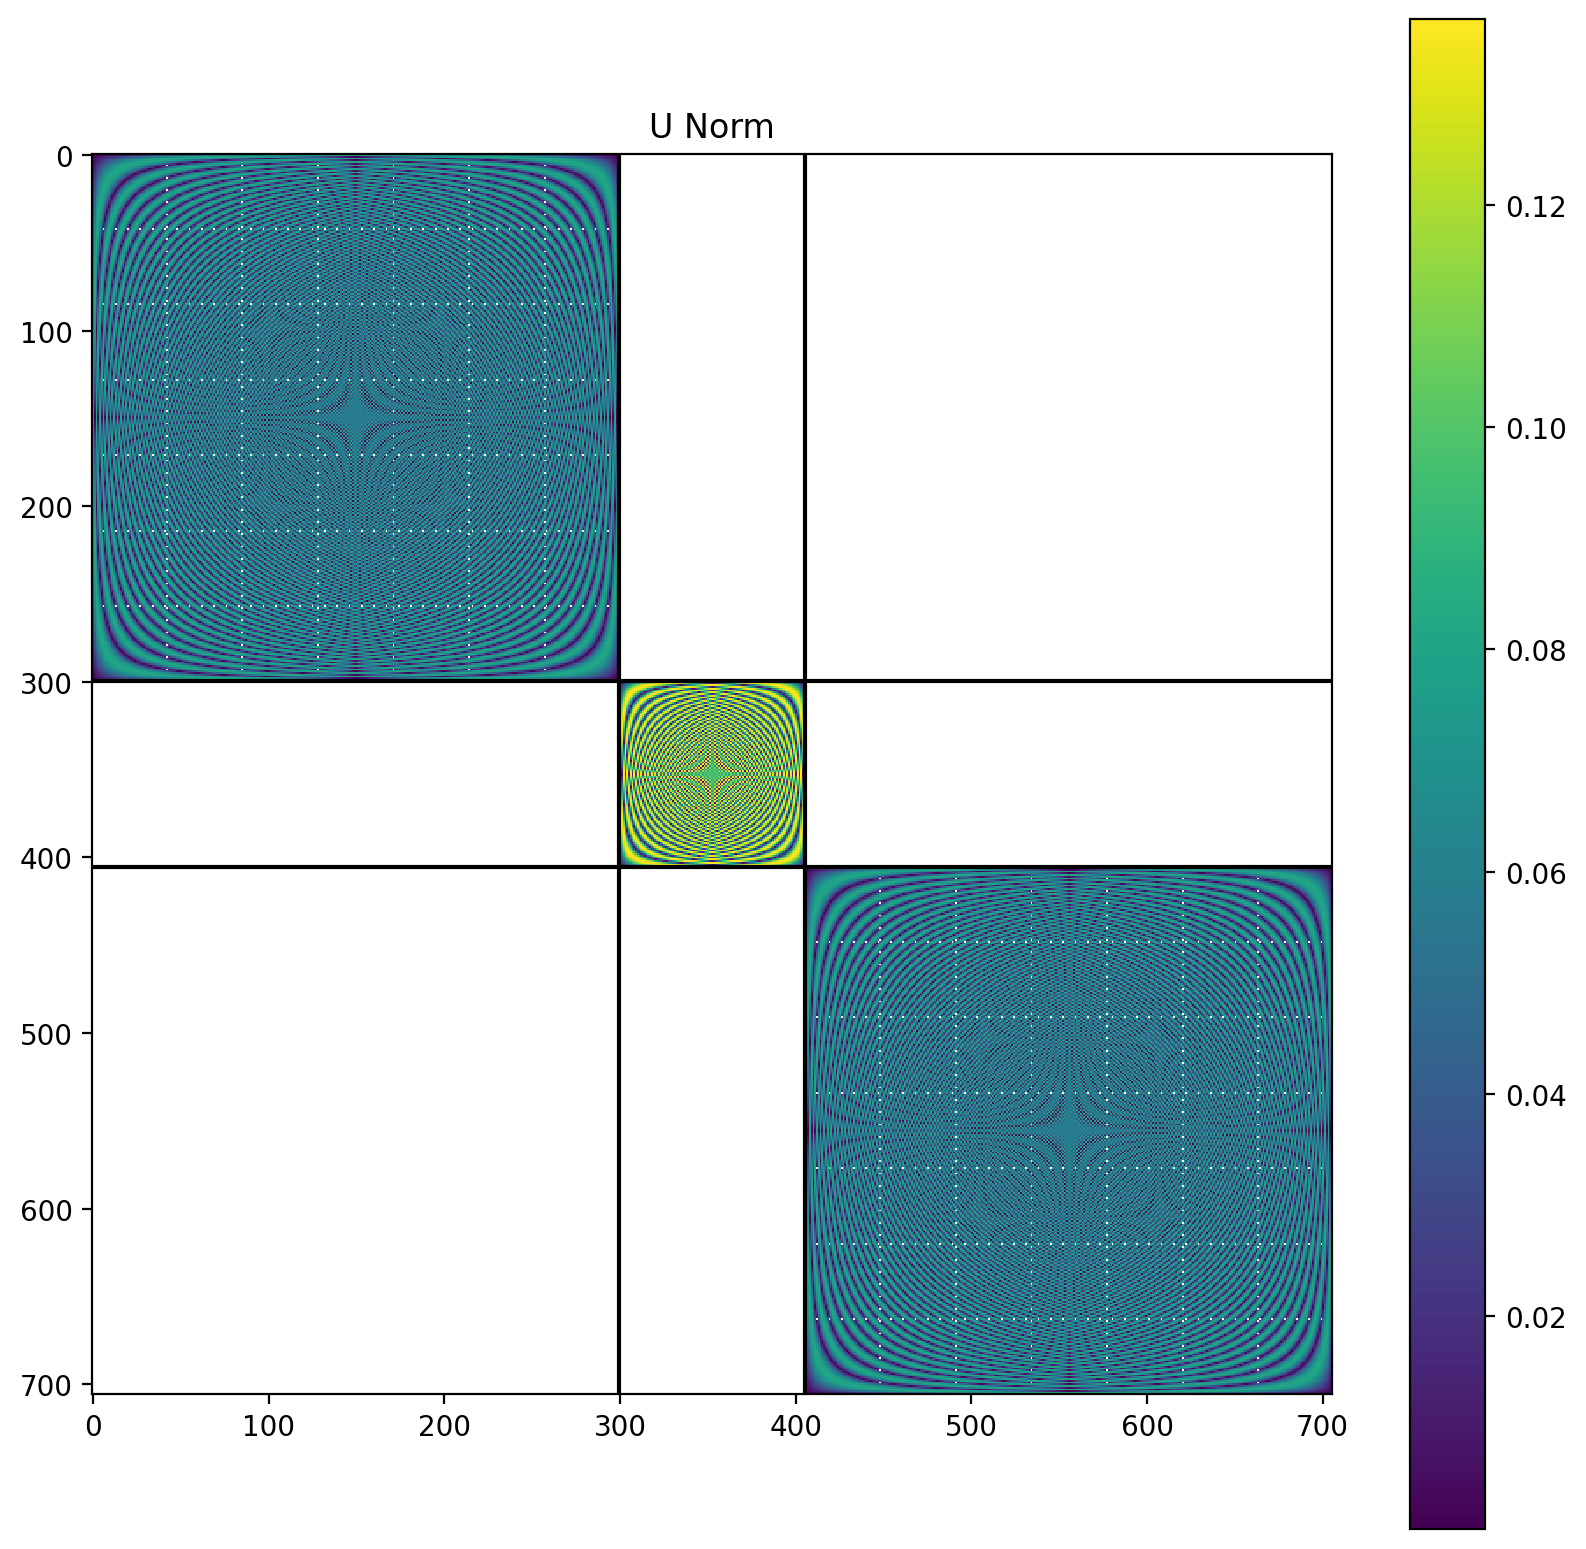

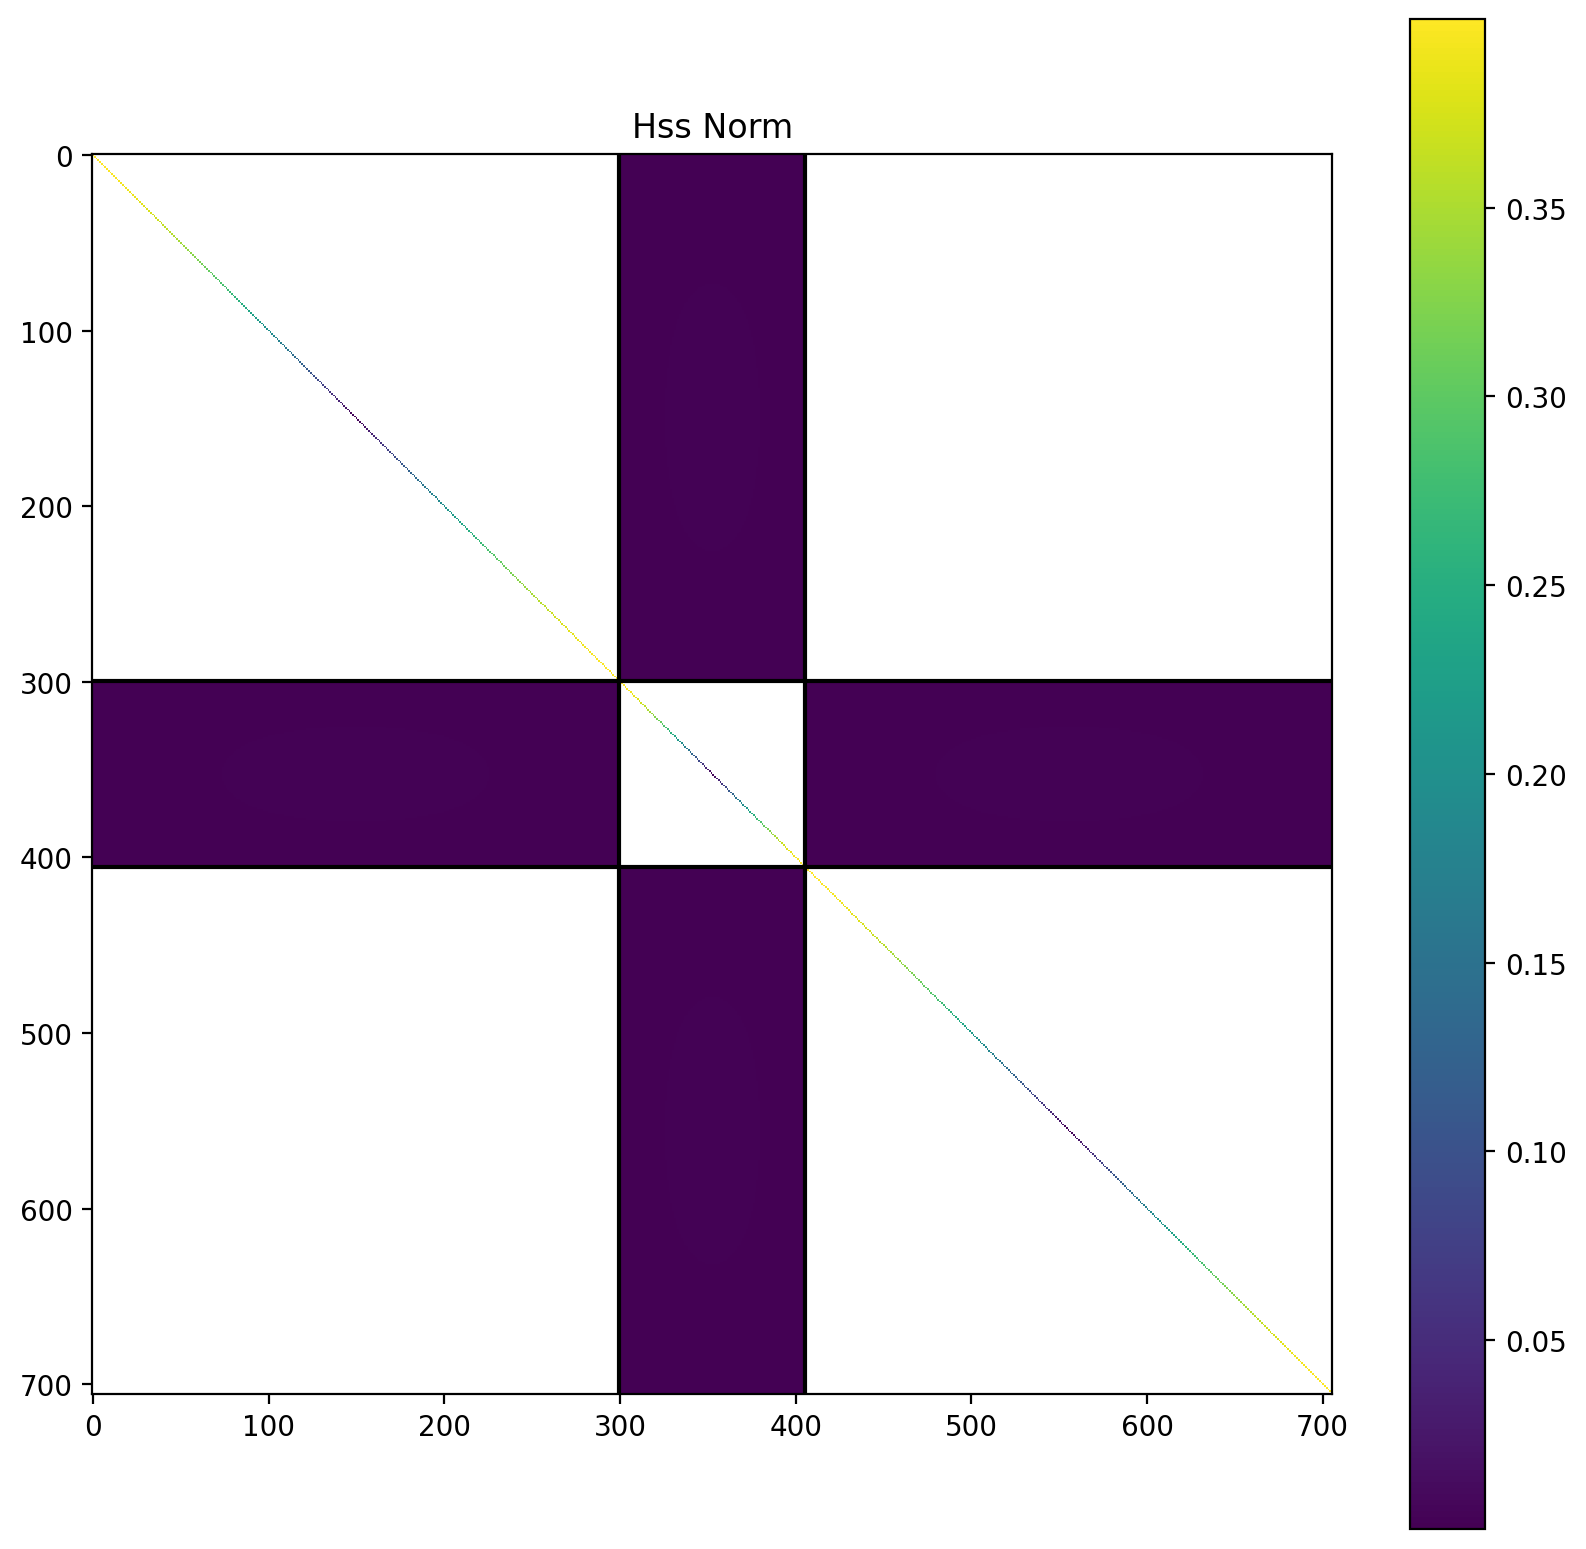

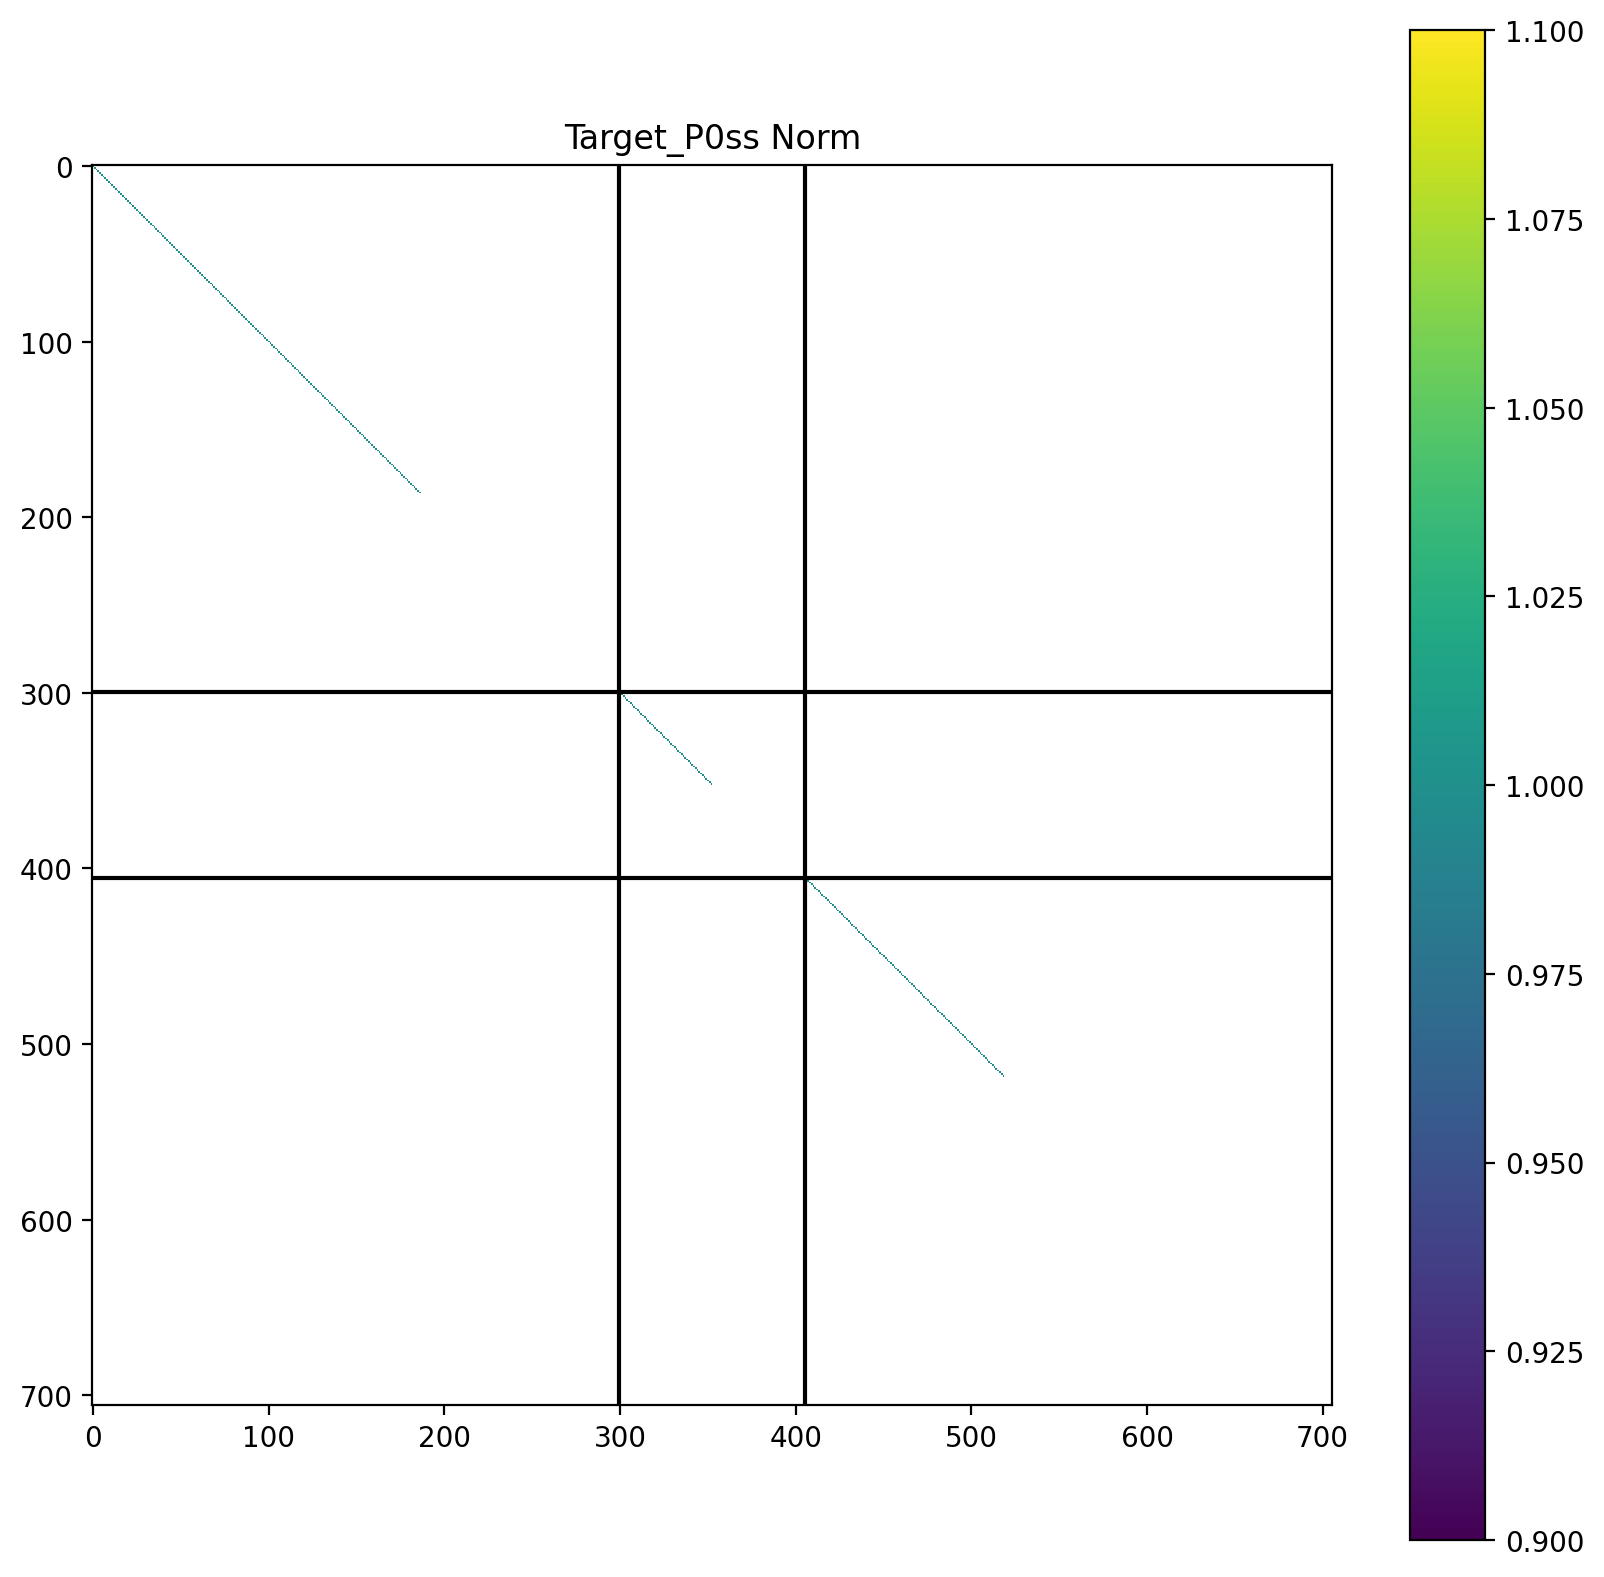

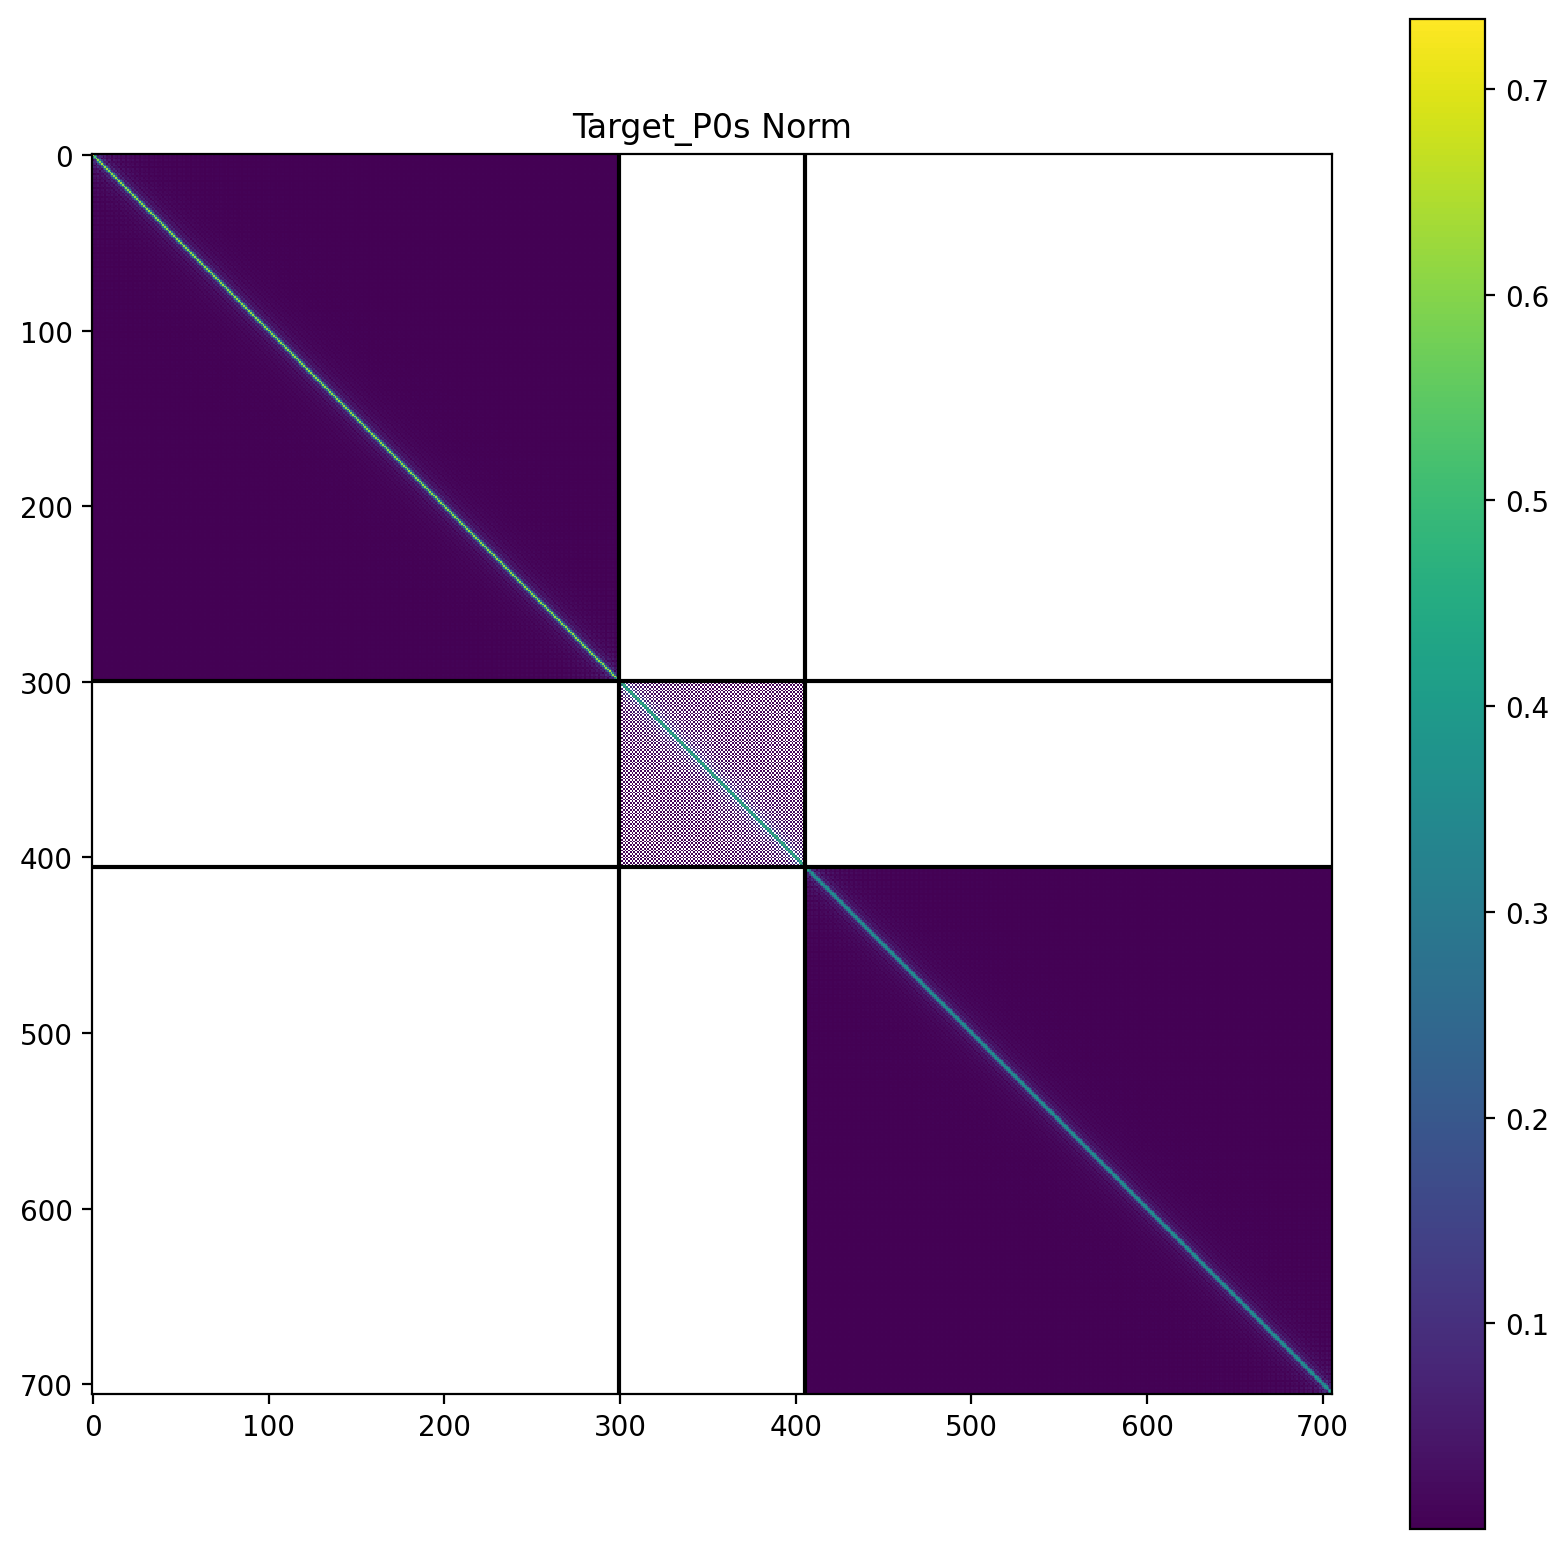

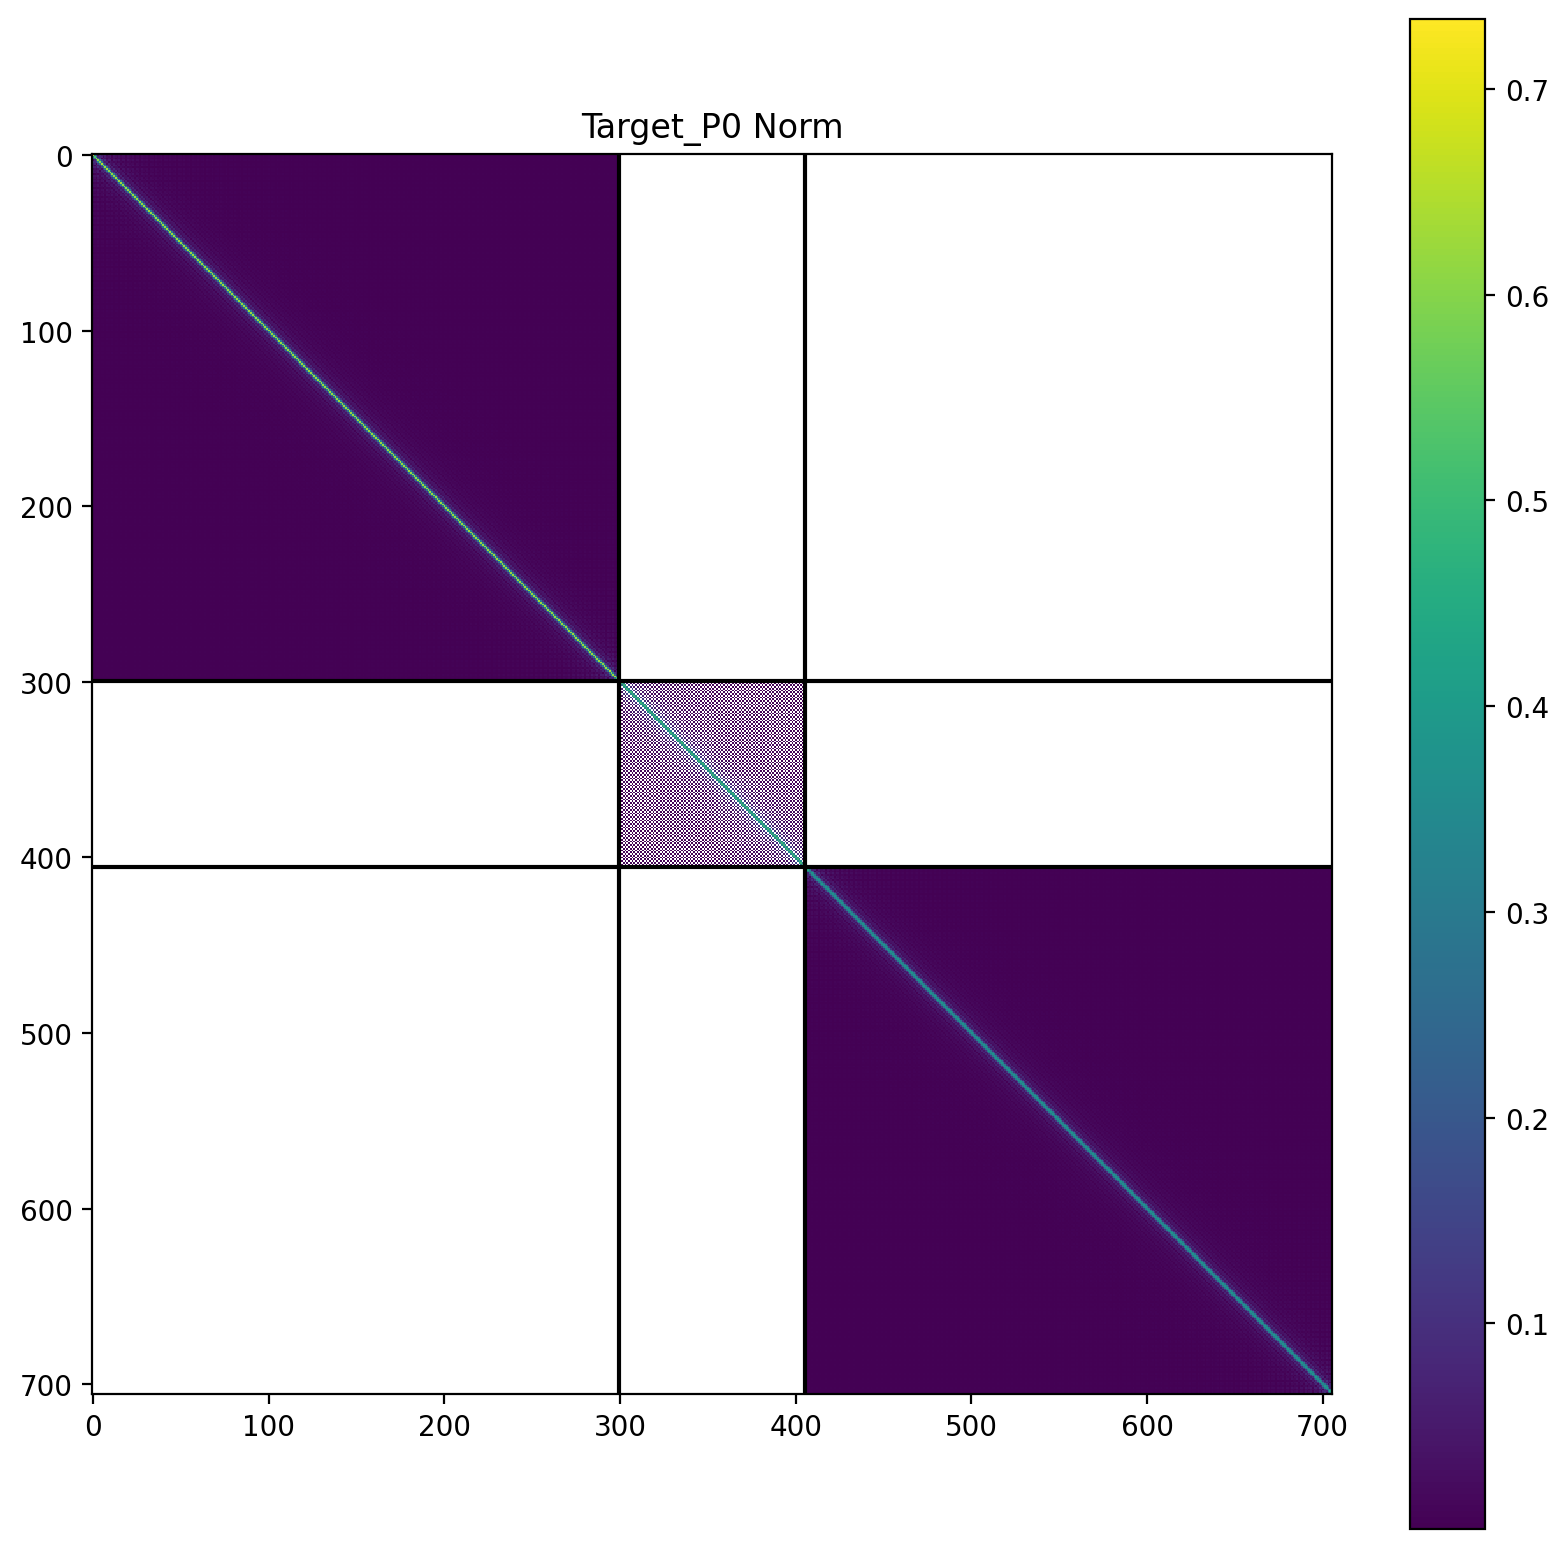

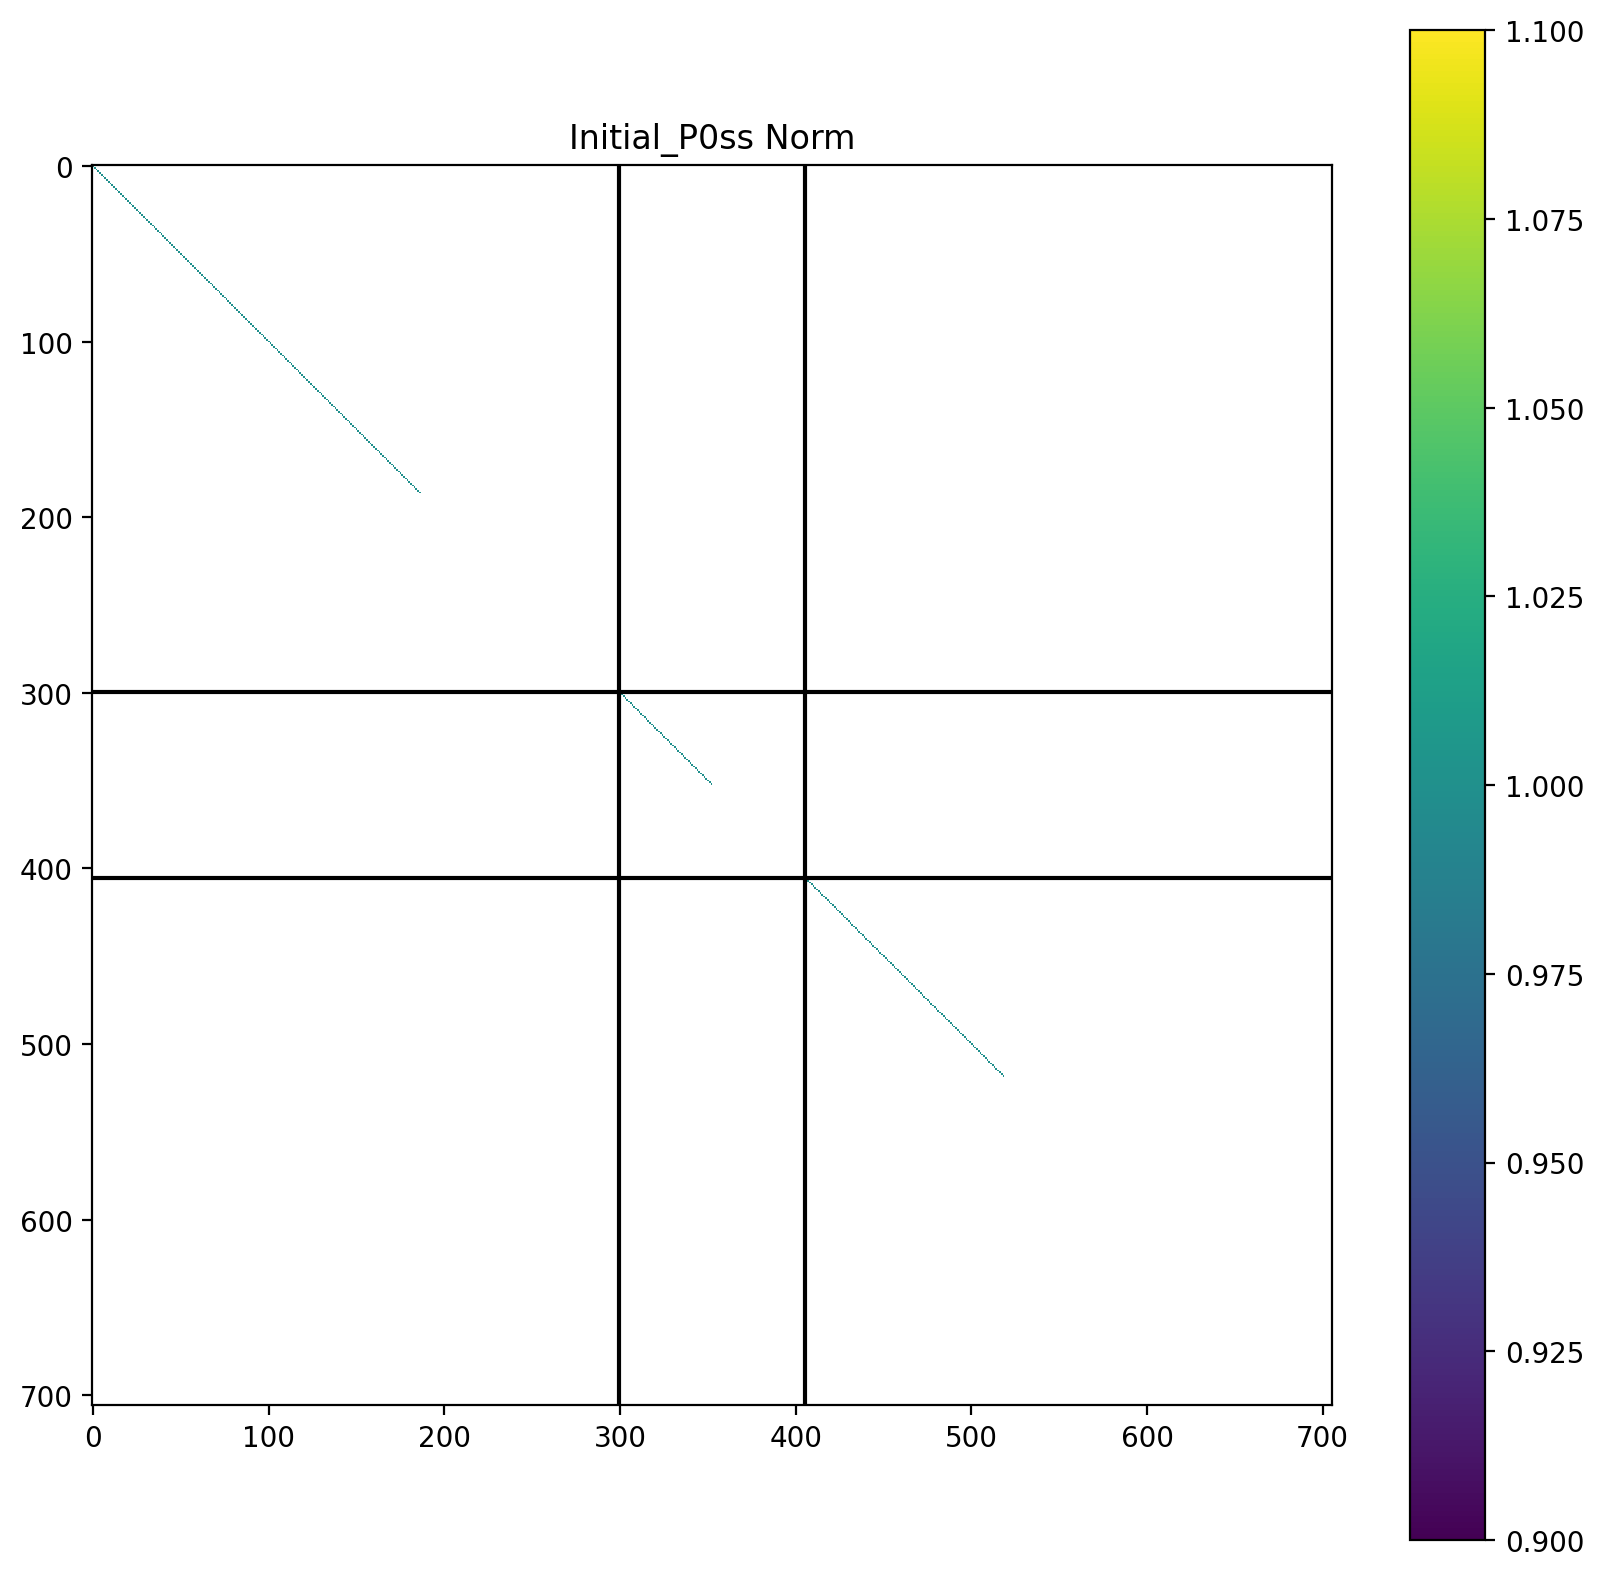

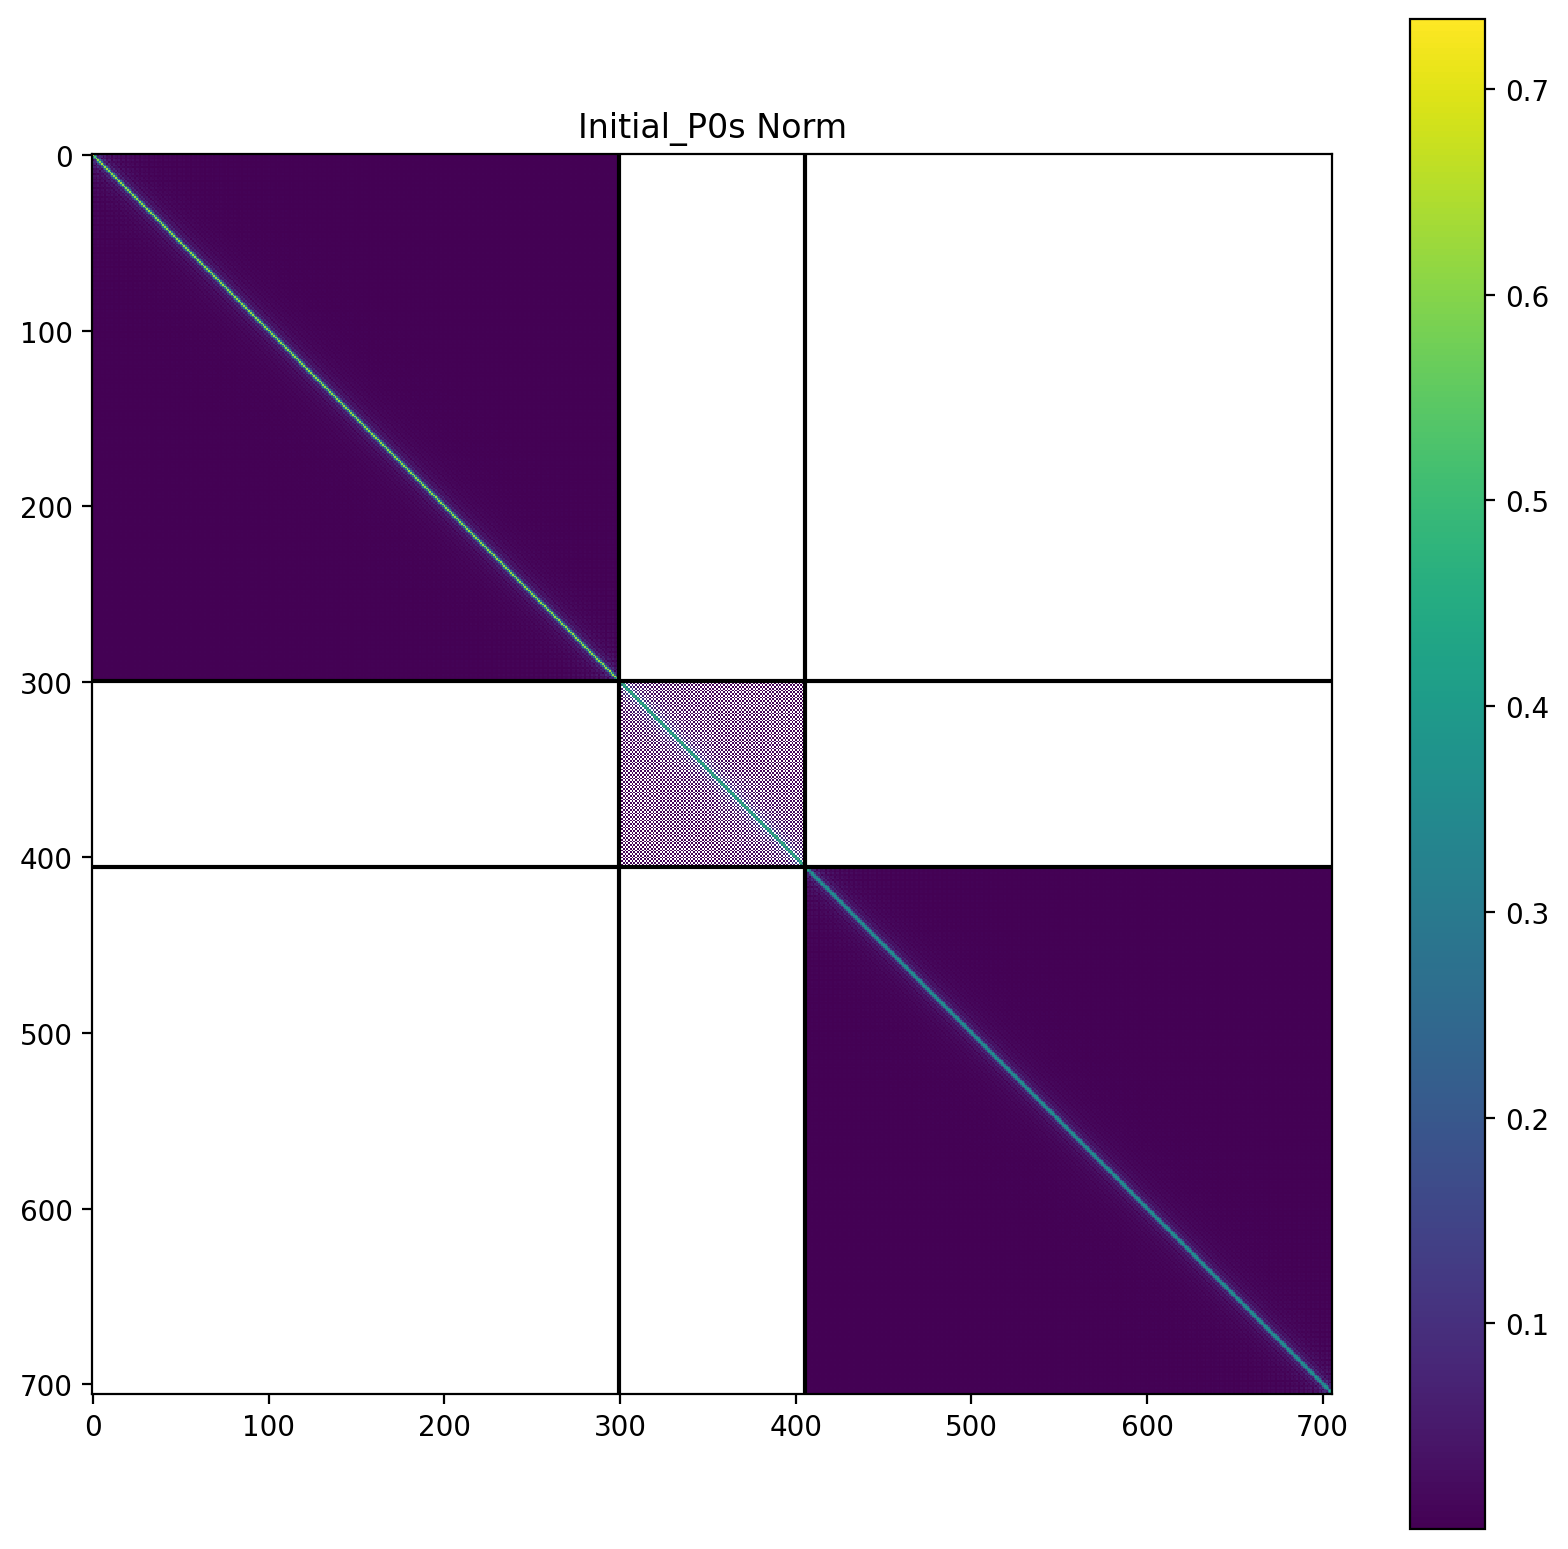

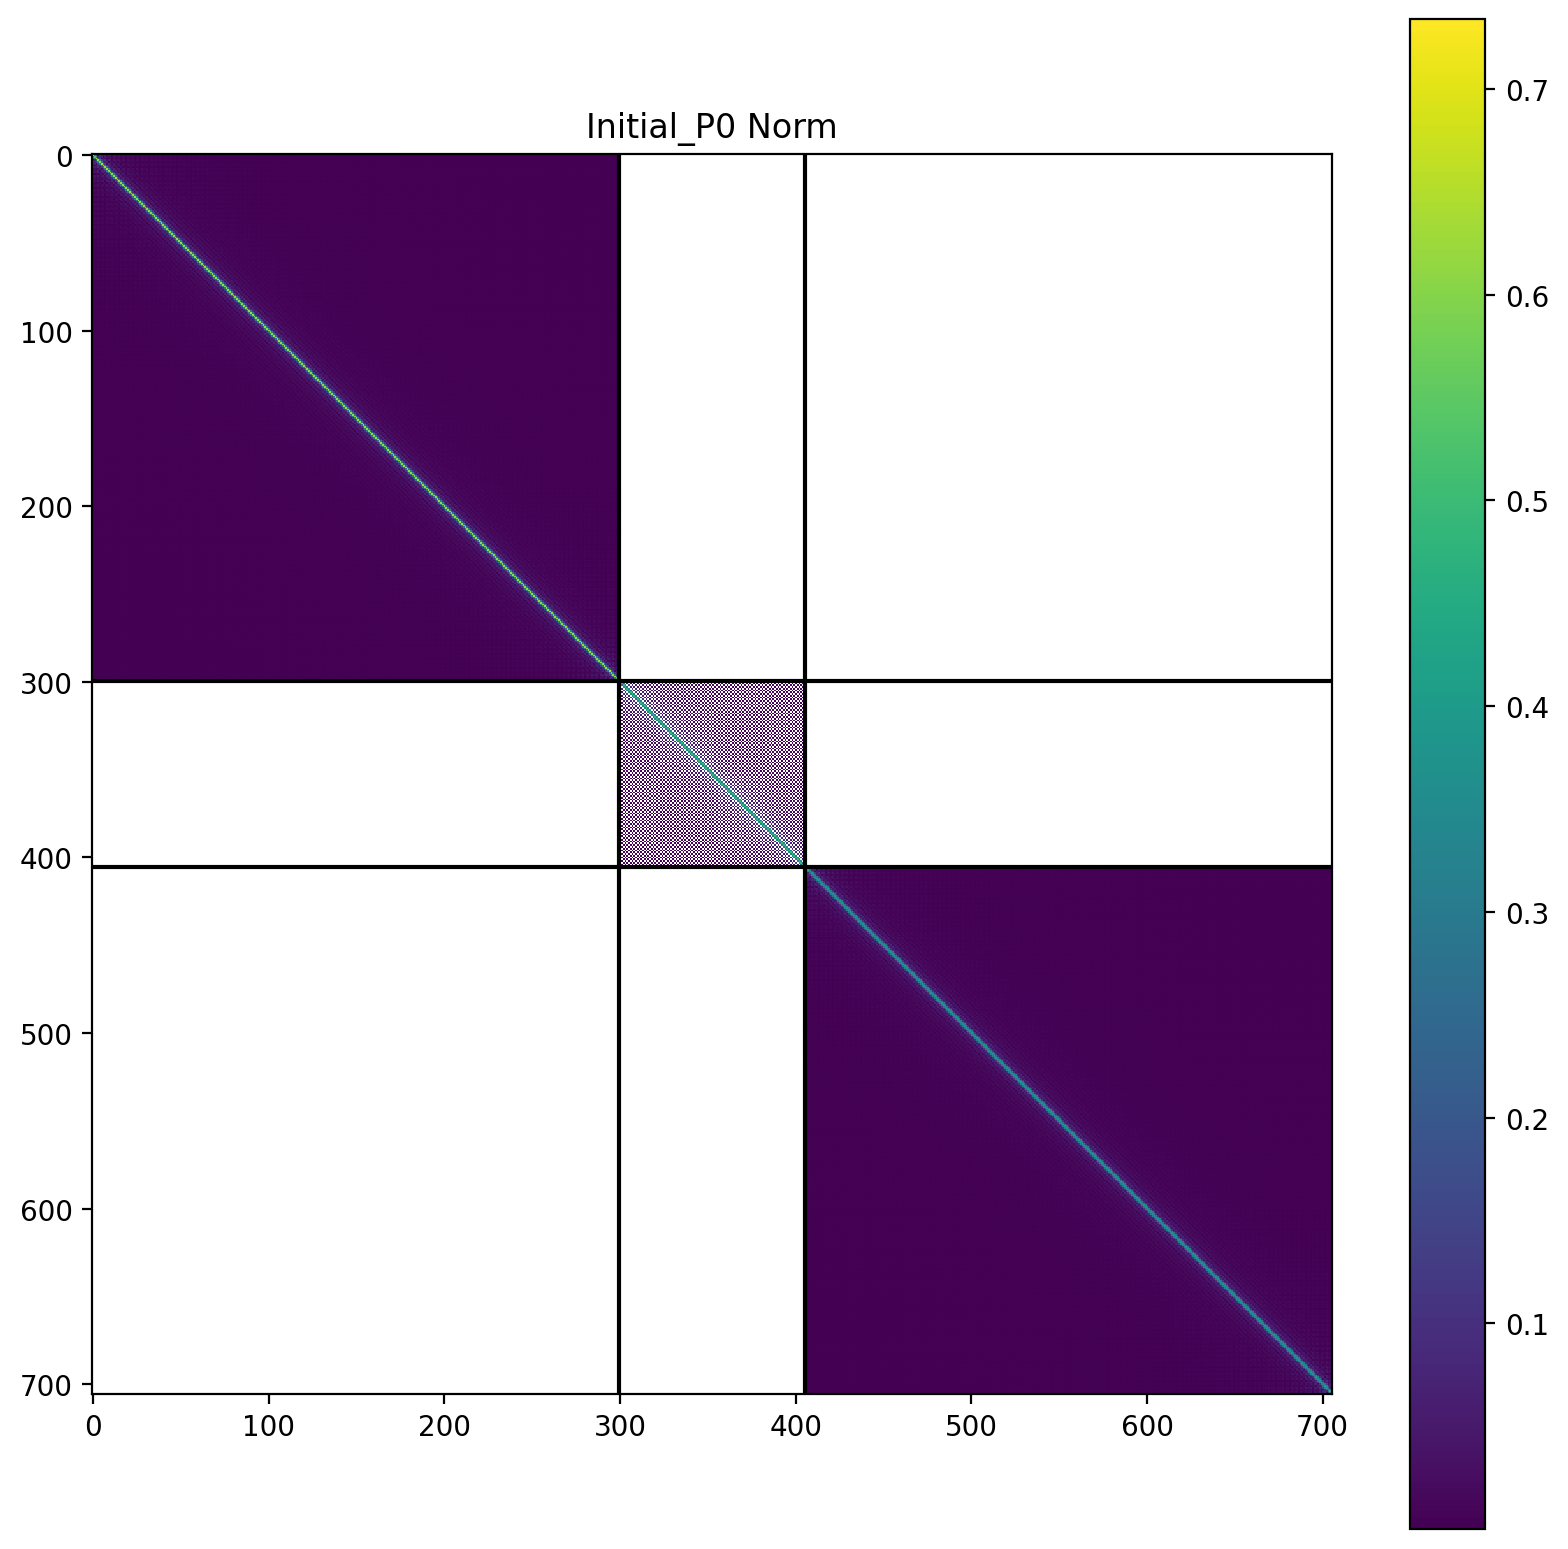

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/cvmfs/sft.cern.ch/lcg/views/LCG_106a_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


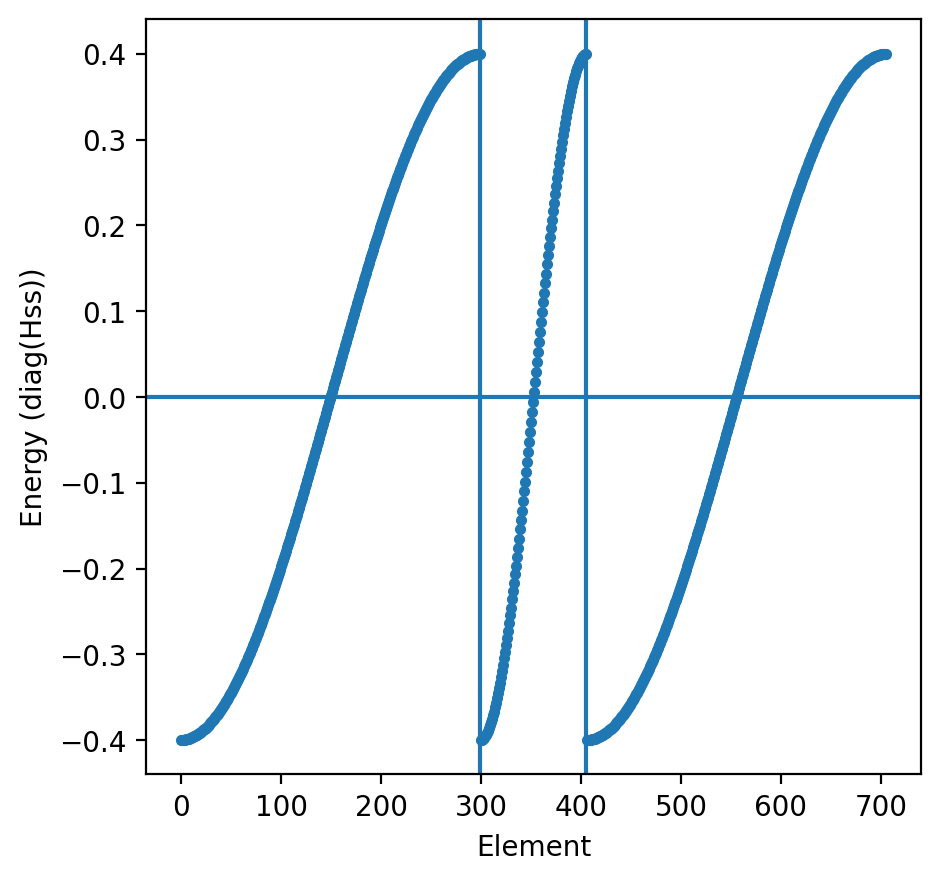

E_F_L= 2.3852447794681098e-17
E_F_R= -3.404394821604484e-17
E_F_EM= -5.594483210025203e-17
E_F= 2.168404344971009e-19


In [2]:
structure_config="Oded"
V_bias=0.3 #V
T_L=0 #K
T_R=0 #K
T_EM=0 #K

H, S, size_lead_L,size_lead_R = Get_Structure(structure_config)
device = Device(
    H=H, 
    S=S, 
    size_lead_L=size_lead_L,size_lead_R=size_lead_R,
    V_bias=V_bias,
    T_L=T_L, T_R=T_R, T_EM=T_EM,
    clean_matrices=True
)
device.Visualize()

In [3]:
Delta_t   = 1 *fs
max_iters = 5000
max_t     = 1500*fs
list_of_outputs=["J Leads Only From State"]
solver_type="RK4_Adaptive_Step"
Gamma_in_invfs_list=[0,]#0.001]#,0.01,0.1,1]
picklefile="OdedPlotDataRK4_New.pkl"

try:
    with open(picklefile,"rb") as f:
        RESULTS=dill.load(f)
except:
    RESULTS={}

for Gamma_in_invfs in Gamma_in_invfs_list:
    print("Starting Gamma: ",Gamma_in_invfs, " invfs")
    if Gamma_in_invfs in RESULTS.keys():
        print("Already found, continuing")
        continue
    
    Gamma=Gamma_in_invfs*invfs
    solver = Solver(device,
        Gamma=Gamma, 
        Delta_t=Delta_t, 
        max_iters=max_iters, 
        list_of_outputs=list_of_outputs, 
        max_t=max_t
    )
    outputs_dict=solver.Propagate_In_State(solver_type=solver_type)
    RESULTS[Gamma_in_invfs]=(solver.t_vec_in_fs,outputs_dict["J Leads Only From State"])
    
    with open(picklefile,"wb") as f:
        dill.dump(RESULTS,f)
    print()

Starting Gamma:  0  invfs
Step 4: Convergence failed, restoring P from the previous time step.
Step 6: Convergence failed, restoring P from the previous time step.
Step 7: Convergence failed, restoring P from the previous time step.
Step 9: Convergence failed, restoring P from the previous time step.
Step 10 out of 5000 - Time: 66.50s
Delta_t, current_t [fs]= 4.0 30.000000000000004
Step 12: Convergence failed, restoring P from the previous time step.
Step 13: Convergence failed, restoring P from the previous time step.
Step 15: Convergence failed, restoring P from the previous time step.
Step 17: Convergence failed, restoring P from the previous time step.
Step 19: Convergence failed, restoring P from the previous time step.
Step 20 out of 5000 - Time: 131.21s
Delta_t, current_t [fs]= 4.0 53.99999999999999
Step 21: Convergence failed, restoring P from the previous time step.
Step 24: Convergence failed, restoring P from the previous time step.
Step 25: Convergence failed, restoring P f

Step 192: Convergence failed, restoring P from the previous time step.
Step 193: Convergence failed, restoring P from the previous time step.
Step 195: Convergence failed, restoring P from the previous time step.
Step 197: Convergence failed, restoring P from the previous time step.
Step 199: Convergence failed, restoring P from the previous time step.
Step 200 out of 5000 - Time: 1281.81s
Delta_t, current_t [fs]= 4.0 454.00000000000097
Step 201: Convergence failed, restoring P from the previous time step.
Step 203: Convergence failed, restoring P from the previous time step.
Step 205: Convergence failed, restoring P from the previous time step.
Step 207: Convergence failed, restoring P from the previous time step.
Step 209: Convergence failed, restoring P from the previous time step.
Step 210 out of 5000 - Time: 1347.70s
Delta_t, current_t [fs]= 4.0 474.0000000000011
Step 212: Convergence failed, restoring P from the previous time step.
Step 213: Convergence failed, restoring P from t

Step 380: Convergence failed, restoring P from the previous time step.
Step 380 out of 5000 - Time: 2357.61s
Delta_t, current_t [fs]= 4.0 850.000000000003
Step 381: Convergence failed, restoring P from the previous time step.
Step 383: Convergence failed, restoring P from the previous time step.
Step 385: Convergence failed, restoring P from the previous time step.
Step 387: Convergence failed, restoring P from the previous time step.
Step 389: Convergence failed, restoring P from the previous time step.
Step 390 out of 5000 - Time: 2377.01s
Delta_t, current_t [fs]= 4.0 870.0000000000026
Step 391: Convergence failed, restoring P from the previous time step.
Step 393: Convergence failed, restoring P from the previous time step.
Step 395: Convergence failed, restoring P from the previous time step.
Step 397: Convergence failed, restoring P from the previous time step.
Step 399: Convergence failed, restoring P from the previous time step.
Step 400 out of 5000 - Time: 2395.71s
Delta_t, cur

Step 565: Convergence failed, restoring P from the previous time step.
Step 567: Convergence failed, restoring P from the previous time step.
Step 569: Convergence failed, restoring P from the previous time step.
Step 570 out of 5000 - Time: 2715.10s
Delta_t, current_t [fs]= 4.0 1261.999999999997
Step 572: Convergence failed, restoring P from the previous time step.
Step 573: Convergence failed, restoring P from the previous time step.
Step 575: Convergence failed, restoring P from the previous time step.
Step 577: Convergence failed, restoring P from the previous time step.
Step 579: Convergence failed, restoring P from the previous time step.
Step 580 out of 5000 - Time: 2734.01s
Delta_t, current_t [fs]= 4.0 1285.9999999999966
Step 581: Convergence failed, restoring P from the previous time step.
Step 583: Convergence failed, restoring P from the previous time step.
Step 585: Convergence failed, restoring P from the previous time step.
Step 587: Convergence failed, restoring P from t

(-0.03, 0.03)

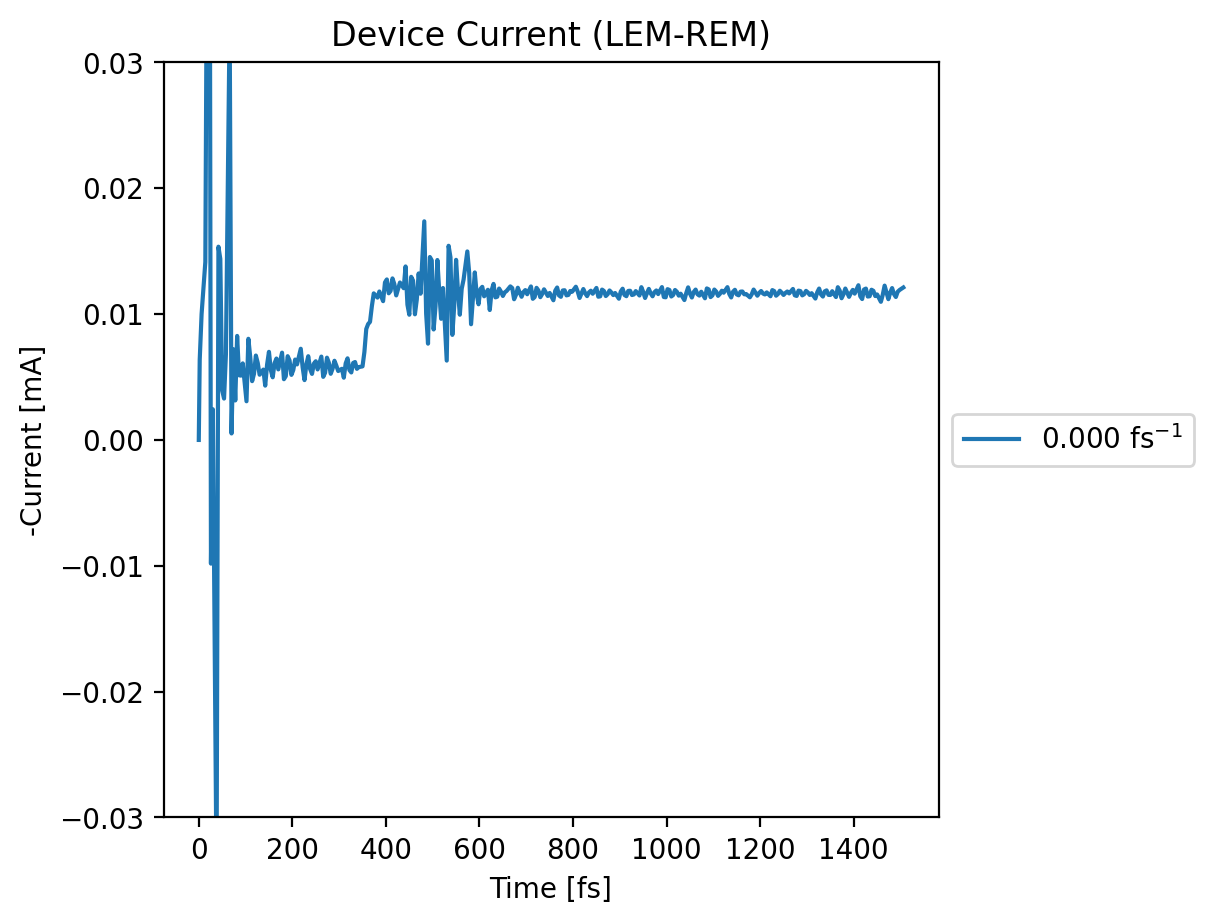

In [5]:
figsize=(5,5)
dpi=200
fig=plt.figure(figsize=figsize,dpi=dpi,facecolor="white")
for Gamma_in_invfs in RESULTS.keys():
    plt.plot(RESULTS[Gamma_in_invfs][0],-np.array(RESULTS[Gamma_in_invfs][1])*1e3,label="{0:.3f}".format(Gamma_in_invfs)+" fs$^{-1}$")
plt.title("Device Current (LEM-REM)")  
plt.xlabel("Time [fs]")
plt.ylabel("-Current [mA]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-0.03,0.03)

In [6]:
Delta_t   = 1 *fs
max_iters = 5000
max_t     = 1500*fs
list_of_outputs=["J Leads Only"]
solver_type="RK4_Adaptive_Step"
Gamma_in_invfs_list=[0,]#0.001]#,0.01,0.1,1]
picklefile="OdedPlotDataRK4_NewSite.pkl"

try:
    with open(picklefile,"rb") as f:
        RESULTS=dill.load(f)
except:
    RESULTS={}

for Gamma_in_invfs in Gamma_in_invfs_list:
    print("Starting Gamma: ",Gamma_in_invfs, " invfs")
    if Gamma_in_invfs in RESULTS.keys():
        print("Already found, continuing")
        continue
    
    Gamma=Gamma_in_invfs*invfs
    solver = Solver(device,
        Gamma=Gamma, 
        Delta_t=Delta_t, 
        max_iters=max_iters, 
        list_of_outputs=list_of_outputs, 
        max_t=max_t
    )
    outputs_dict=solver.Propagate_In_Site(solver_type=solver_type)
    RESULTS[Gamma_in_invfs]=(solver.t_vec_in_fs,outputs_dict["J Leads Only"])
    
    with open(picklefile,"wb") as f:
        dill.dump(RESULTS,f)
    print()

Starting Gamma:  0  invfs
Step 4: Convergence failed, restoring P from the previous time step.
Step 6: Convergence failed, restoring P from the previous time step.
Step 7: Convergence failed, restoring P from the previous time step.
Step 9: Convergence failed, restoring P from the previous time step.
Step 10 out of 5000 - Time: 21.60s
Delta_t, current_t [fs]= 4.0 30.000000000000004
Step 12: Convergence failed, restoring P from the previous time step.
Step 13: Convergence failed, restoring P from the previous time step.
Step 15: Convergence failed, restoring P from the previous time step.
Step 17: Convergence failed, restoring P from the previous time step.
Step 19: Convergence failed, restoring P from the previous time step.
Step 20 out of 5000 - Time: 42.39s
Delta_t, current_t [fs]= 4.0 53.99999999999999
Step 21: Convergence failed, restoring P from the previous time step.
Step 24: Convergence failed, restoring P from the previous time step.
Step 25: Convergence failed, restoring P fr

Step 192: Convergence failed, restoring P from the previous time step.
Step 193: Convergence failed, restoring P from the previous time step.
Step 195: Convergence failed, restoring P from the previous time step.
Step 197: Convergence failed, restoring P from the previous time step.
Step 199: Convergence failed, restoring P from the previous time step.
Step 200 out of 5000 - Time: 412.50s
Delta_t, current_t [fs]= 4.0 454.00000000000097
Step 201: Convergence failed, restoring P from the previous time step.
Step 203: Convergence failed, restoring P from the previous time step.
Step 205: Convergence failed, restoring P from the previous time step.
Step 207: Convergence failed, restoring P from the previous time step.
Step 209: Convergence failed, restoring P from the previous time step.
Step 210 out of 5000 - Time: 433.09s
Delta_t, current_t [fs]= 4.0 474.0000000000011
Step 212: Convergence failed, restoring P from the previous time step.
Step 213: Convergence failed, restoring P from the

Step 381: Convergence failed, restoring P from the previous time step.
Step 383: Convergence failed, restoring P from the previous time step.
Step 385: Convergence failed, restoring P from the previous time step.
Step 387: Convergence failed, restoring P from the previous time step.
Step 389: Convergence failed, restoring P from the previous time step.
Step 390 out of 5000 - Time: 806.49s
Delta_t, current_t [fs]= 4.0 870.0000000000026
Step 391: Convergence failed, restoring P from the previous time step.
Step 393: Convergence failed, restoring P from the previous time step.
Step 395: Convergence failed, restoring P from the previous time step.
Step 397: Convergence failed, restoring P from the previous time step.
Step 399: Convergence failed, restoring P from the previous time step.
Step 400 out of 5000 - Time: 826.99s
Delta_t, current_t [fs]= 4.0 890.0000000000022
Step 402: Convergence failed, restoring P from the previous time step.
Step 403: Convergence failed, restoring P from the 

Step 570 out of 5000 - Time: 1179.60s
Delta_t, current_t [fs]= 4.0 1261.999999999997
Step 572: Convergence failed, restoring P from the previous time step.
Step 573: Convergence failed, restoring P from the previous time step.
Step 575: Convergence failed, restoring P from the previous time step.
Step 577: Convergence failed, restoring P from the previous time step.
Step 579: Convergence failed, restoring P from the previous time step.
Step 580 out of 5000 - Time: 1200.30s
Delta_t, current_t [fs]= 4.0 1285.9999999999966
Step 581: Convergence failed, restoring P from the previous time step.
Step 583: Convergence failed, restoring P from the previous time step.
Step 585: Convergence failed, restoring P from the previous time step.
Step 587: Convergence failed, restoring P from the previous time step.
Step 589: Convergence failed, restoring P from the previous time step.
Step 590 out of 5000 - Time: 1221.00s
Delta_t, current_t [fs]= 4.0 1305.9999999999964
Step 591: Convergence failed, res

KeyError: 'J Leads Only From State'

(-0.03, 0.03)

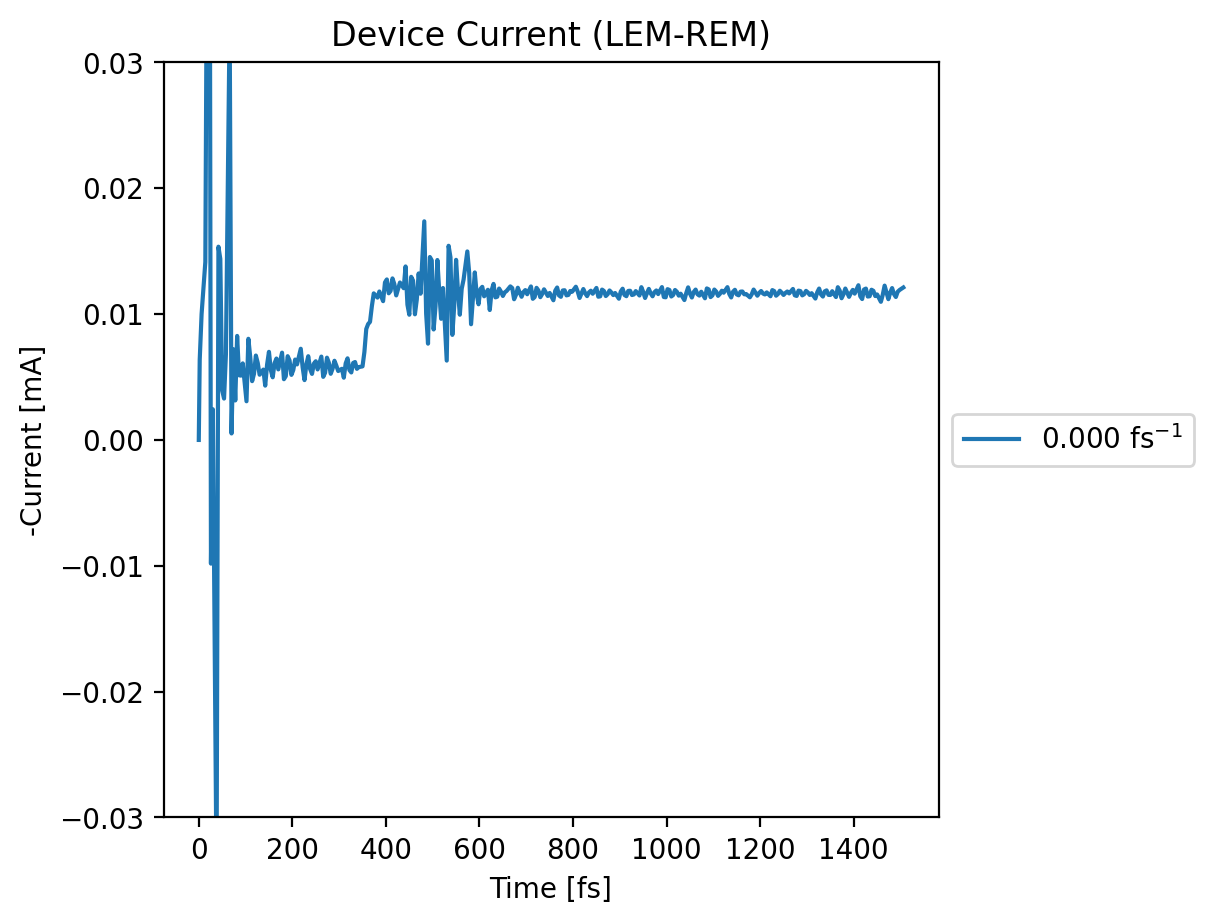

In [8]:
figsize=(5,5)
dpi=200
fig=plt.figure(figsize=figsize,dpi=dpi,facecolor="white")
for Gamma_in_invfs in RESULTS.keys():
    plt.plot(RESULTS[Gamma_in_invfs][0],-np.array(RESULTS[Gamma_in_invfs][1])*1e3,label="{0:.3f}".format(Gamma_in_invfs)+" fs$^{-1}$")
plt.title("Device Current (LEM-REM)")  
plt.xlabel("Time [fs]")
plt.ylabel("-Current [mA]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-0.03,0.03)

Step 4: Convergence failed, restoring P from the previous time step.
Step 6: Convergence failed, restoring P from the previous time step.
Step 7: Convergence failed, restoring P from the previous time step.
Step 9: Convergence failed, restoring P from the previous time step.
Step 10 out of 100 - Time: 19.90s
Delta_t, current_t [fs]= 4.0 30.000000000000004
Step 12: Convergence failed, restoring P from the previous time step.
Step 13: Convergence failed, restoring P from the previous time step.
Step 15: Convergence failed, restoring P from the previous time step.
Step 17: Convergence failed, restoring P from the previous time step.
Step 19: Convergence failed, restoring P from the previous time step.
Step 20 out of 100 - Time: 39.40s
Delta_t, current_t [fs]= 4.0 53.99999999999999
Step 21: Convergence failed, restoring P from the previous time step.
Step 24: Convergence failed, restoring P from the previous time step.
Step 25: Convergence failed, restoring P from the previous time step.
S

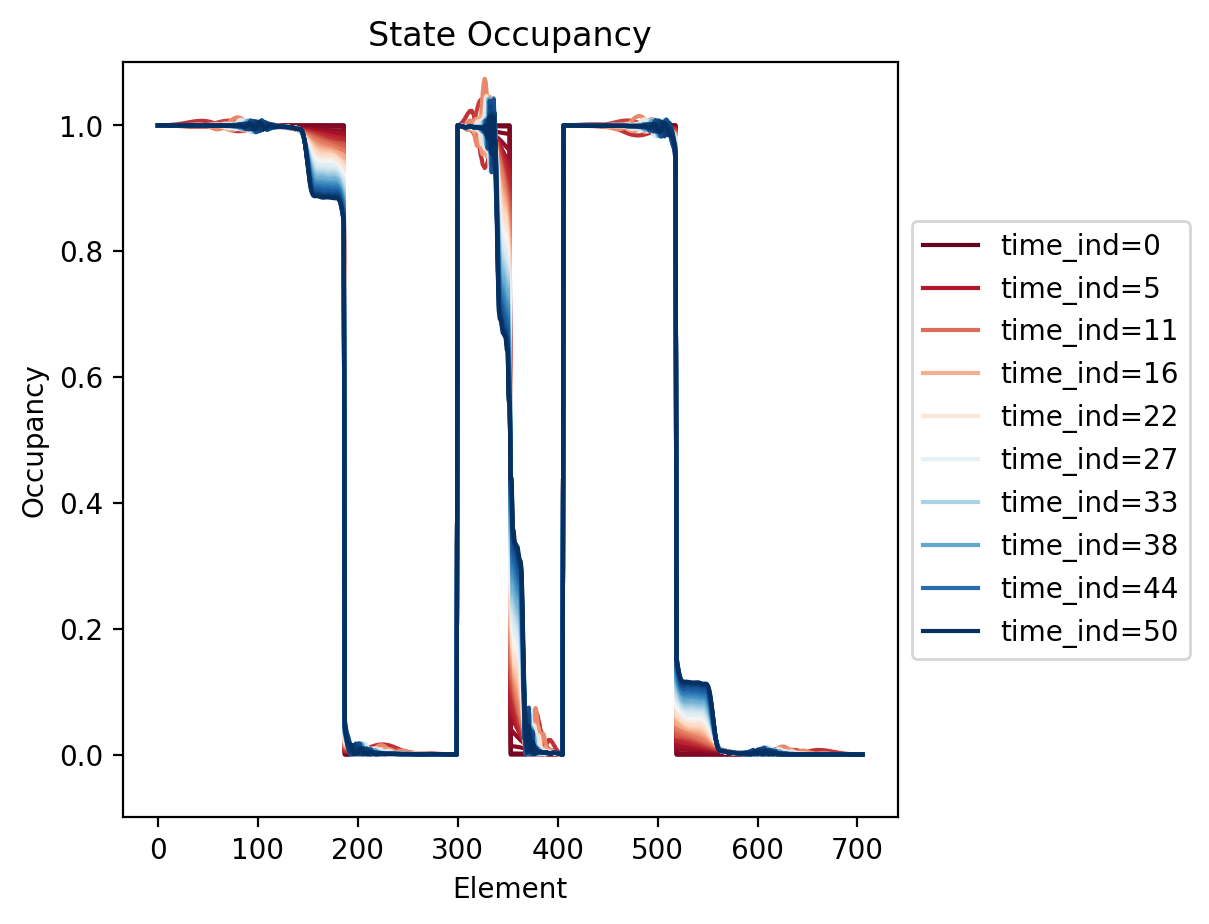

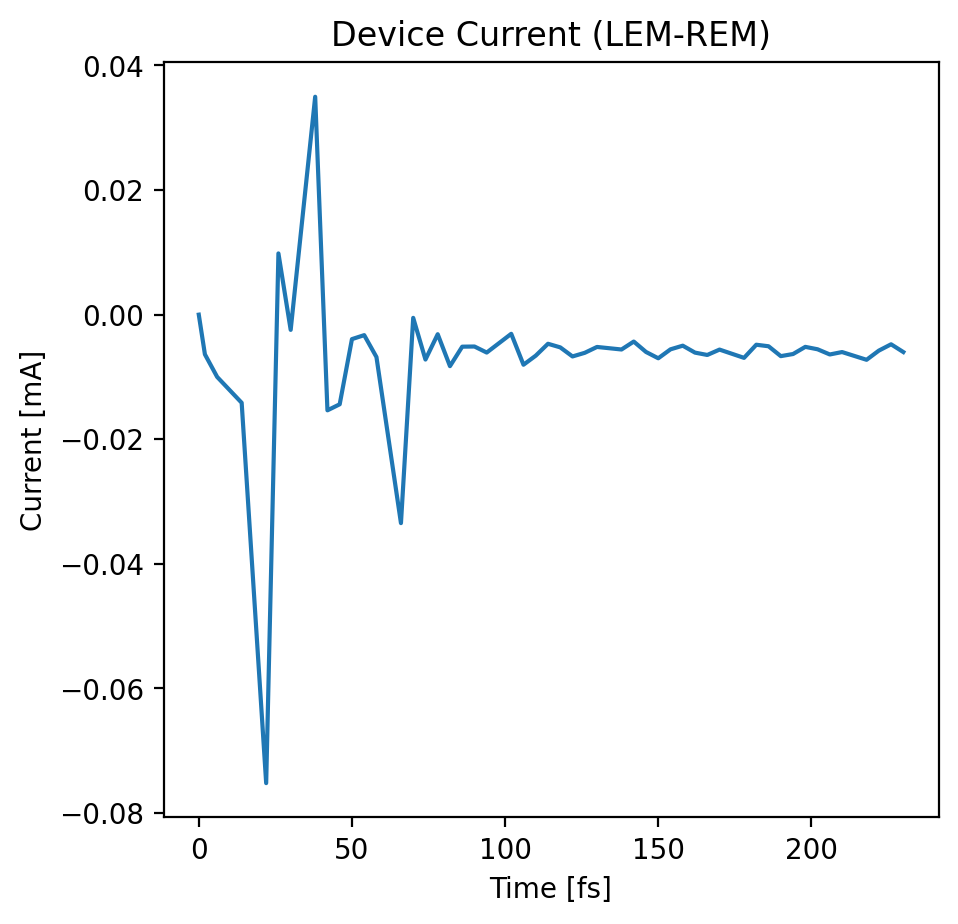

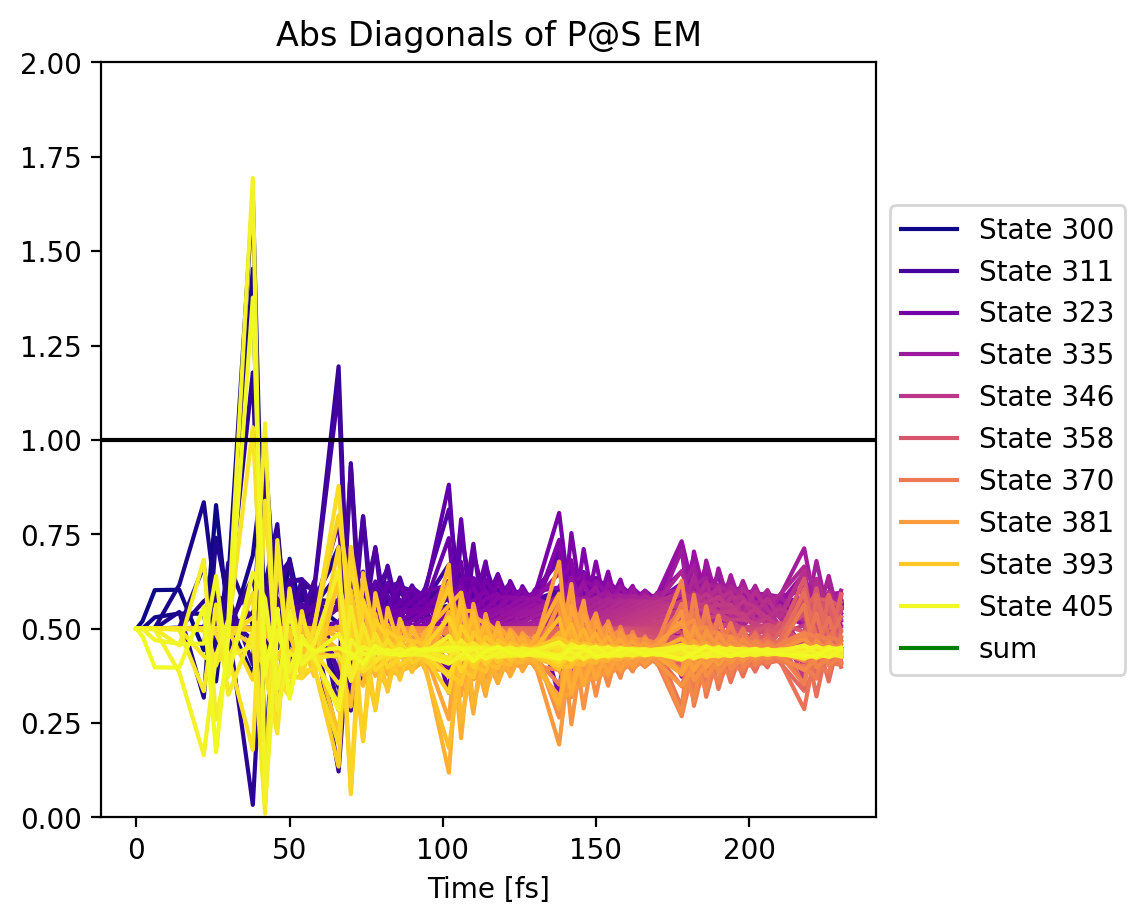

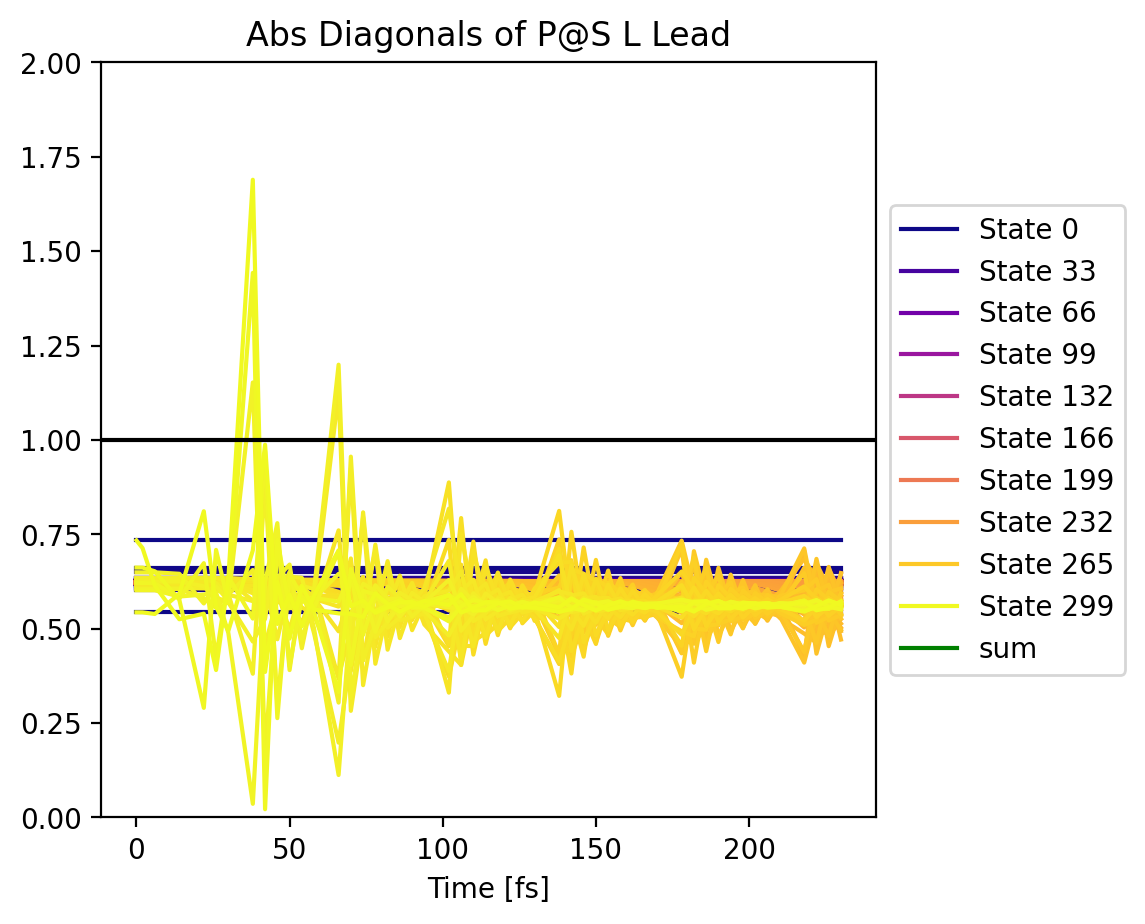

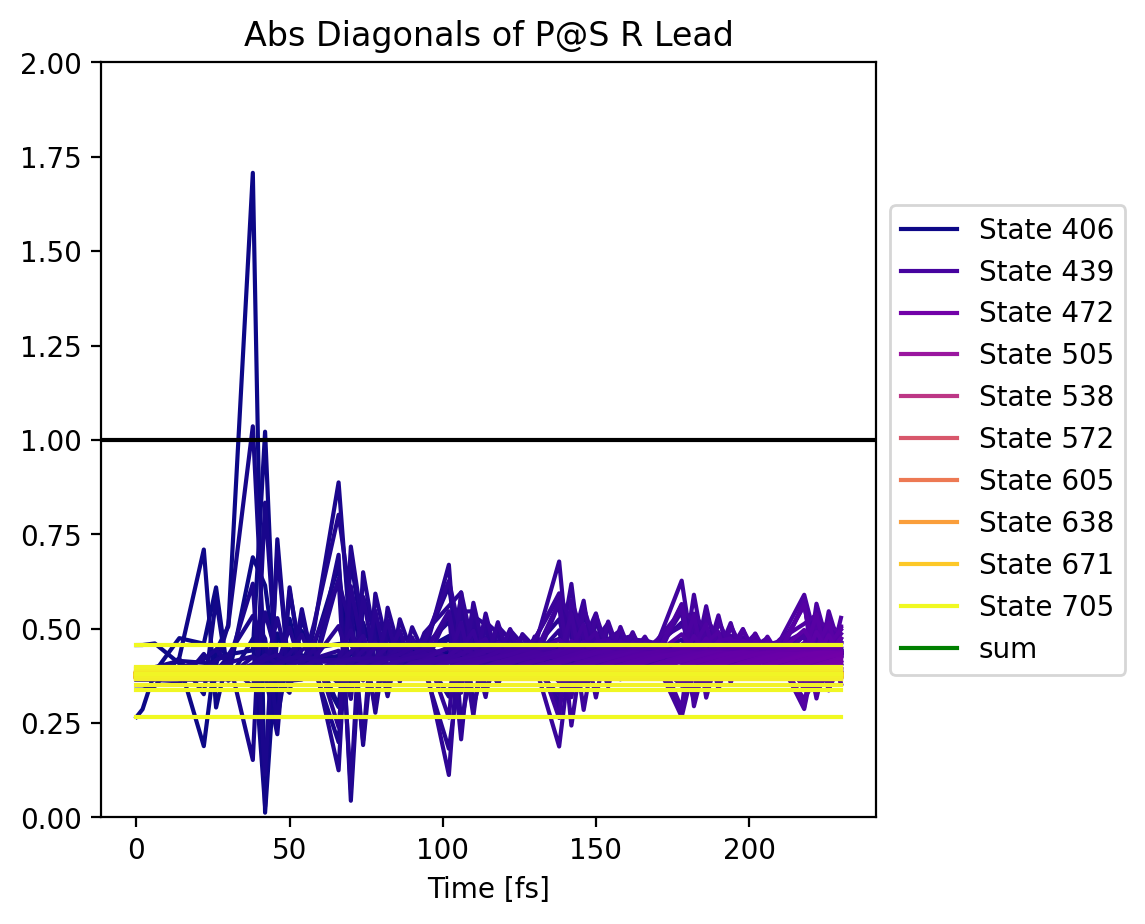

In [9]:
Gamma     = 0.000 *invfs
Delta_t   = 1 *fs
max_iters = 100
list_of_outputs=["Pss diagonal","J Leads Only From State","P@S diagonal From State"]
solver_type="RK4_Adaptive_Step"

solver = Solver(device,
    Gamma=Gamma, 
    Delta_t=Delta_t, 
    max_iters=max_iters, 
    list_of_outputs=list_of_outputs, 
)
outputs_dict=solver.Propagate_In_State(solver_type=solver_type)
t_vec_in_fs=solver.t_vec_in_fs
plots_dict=solver.Visualize_Results(figsize=(5,5),dpi=200)

Step 4: Convergence failed, restoring P from the previous time step.
Step 6: Convergence failed, restoring P from the previous time step.
Step 7: Convergence failed, restoring P from the previous time step.
Step 9: Convergence failed, restoring P from the previous time step.
Step 10 out of 100 - Time: 21.91s
Delta_t, current_t [fs]= 4.0 30.000000000000004
Step 12: Convergence failed, restoring P from the previous time step.
Step 13: Convergence failed, restoring P from the previous time step.
Step 15: Convergence failed, restoring P from the previous time step.
Step 17: Convergence failed, restoring P from the previous time step.
Step 19: Convergence failed, restoring P from the previous time step.
Step 20 out of 100 - Time: 43.10s
Delta_t, current_t [fs]= 4.0 53.99999999999999
Step 21: Convergence failed, restoring P from the previous time step.
Step 24: Convergence failed, restoring P from the previous time step.
Step 25: Convergence failed, restoring P from the previous time step.
S

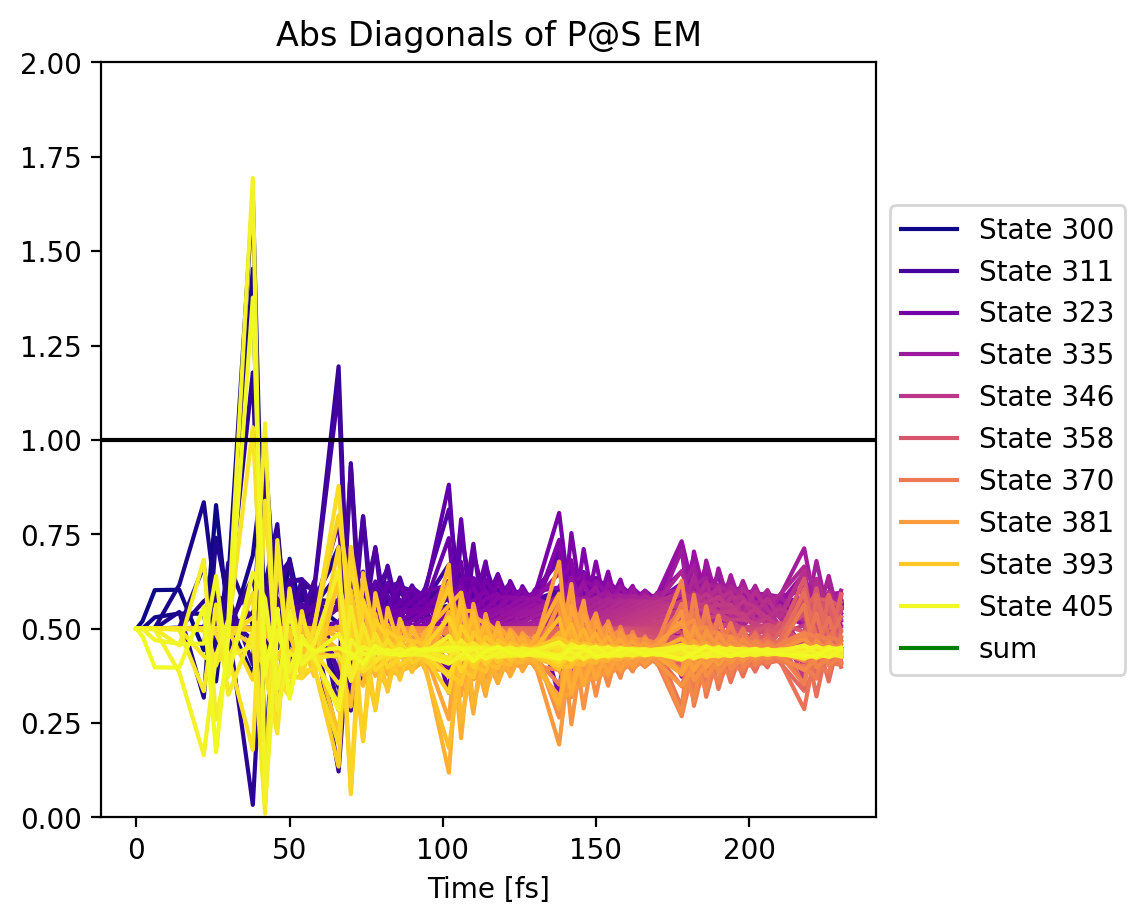

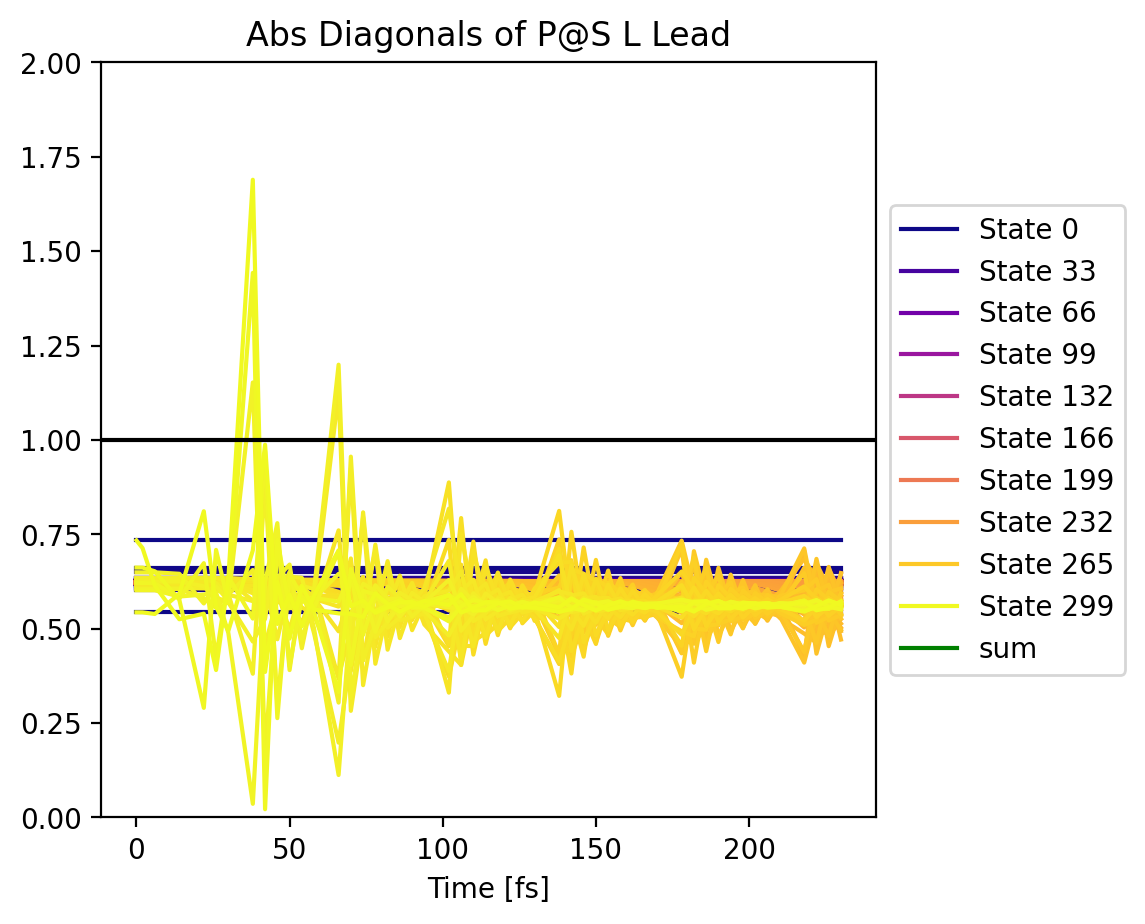

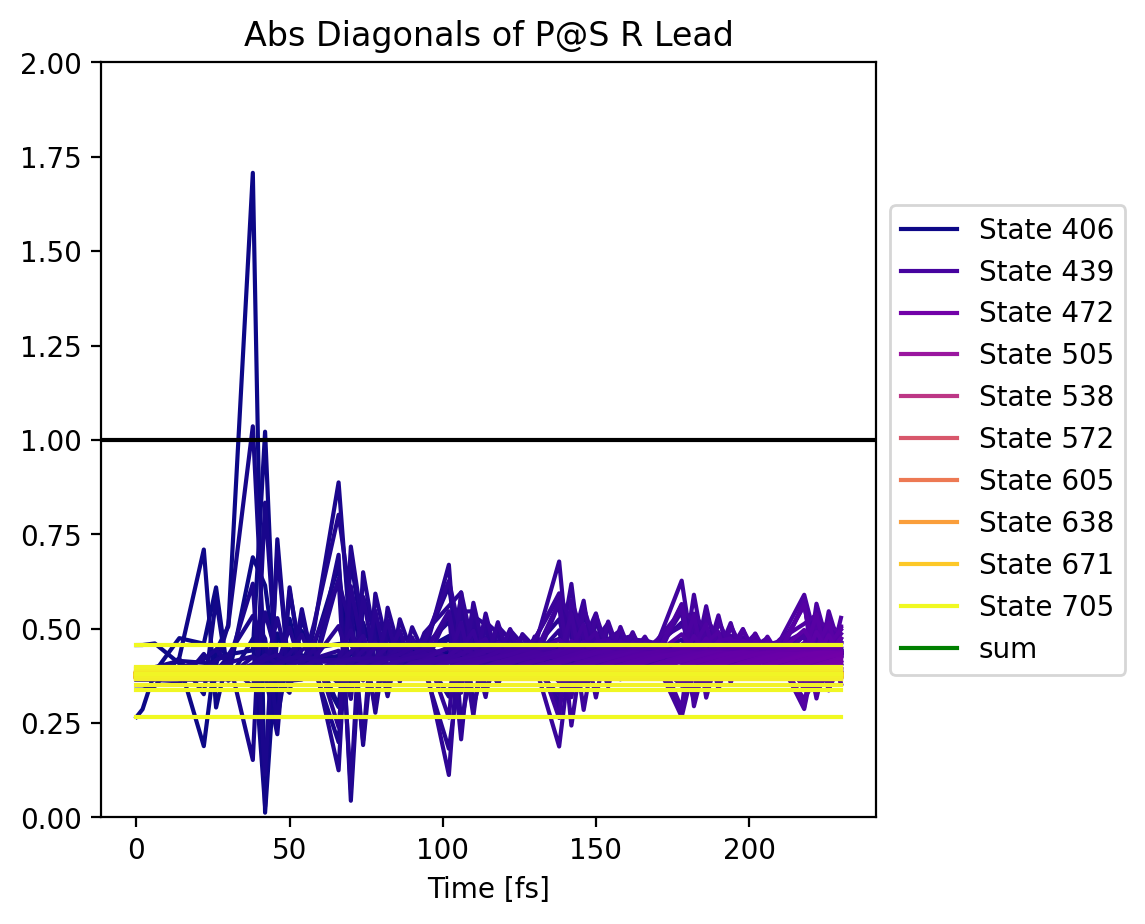

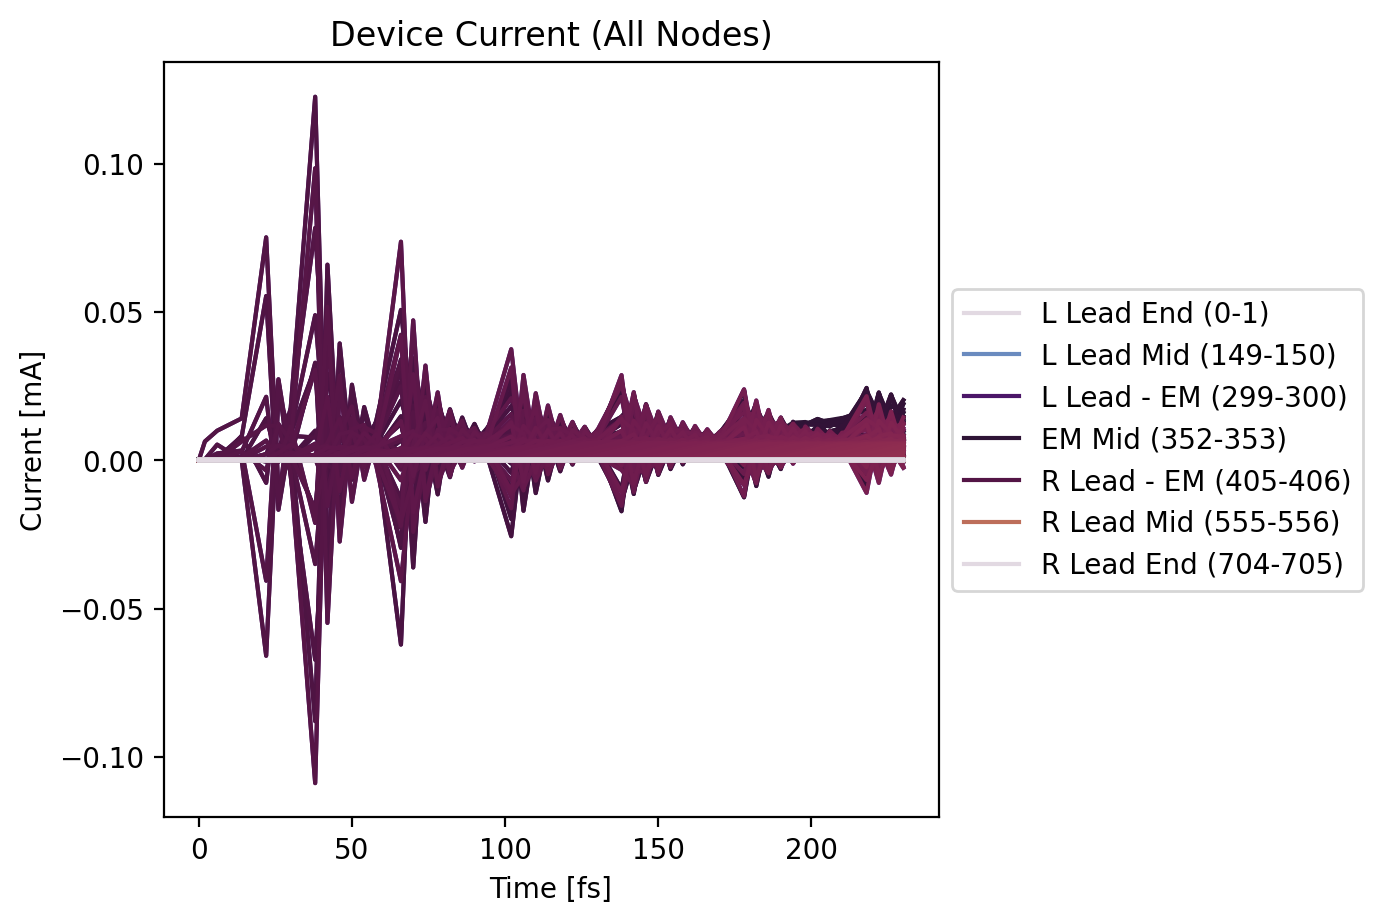

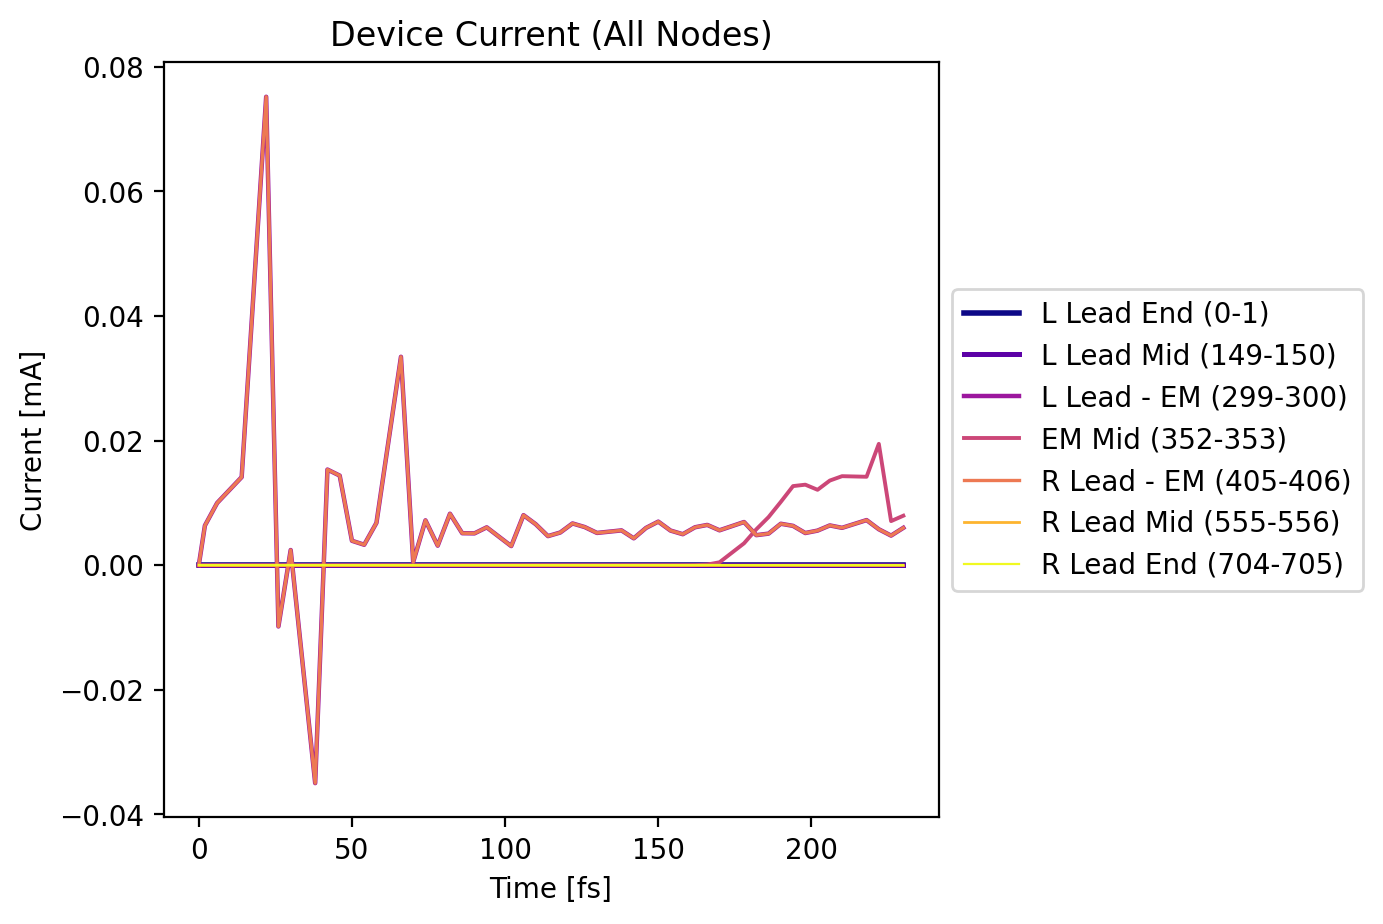

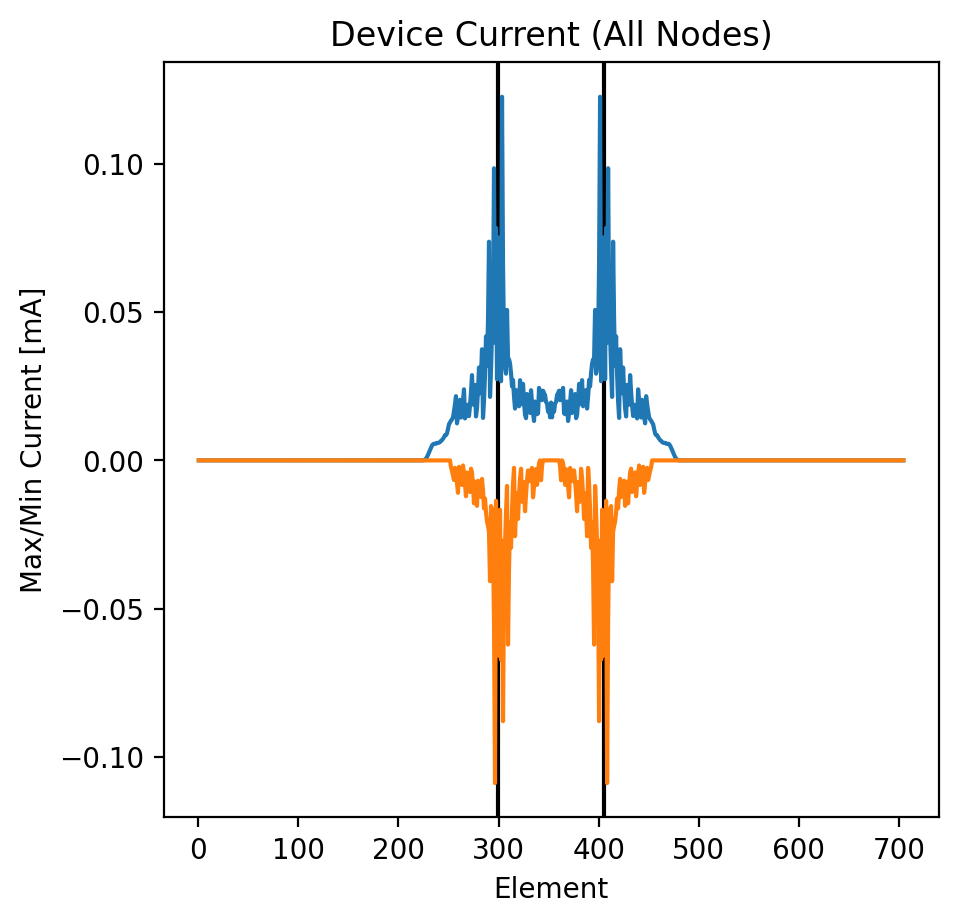

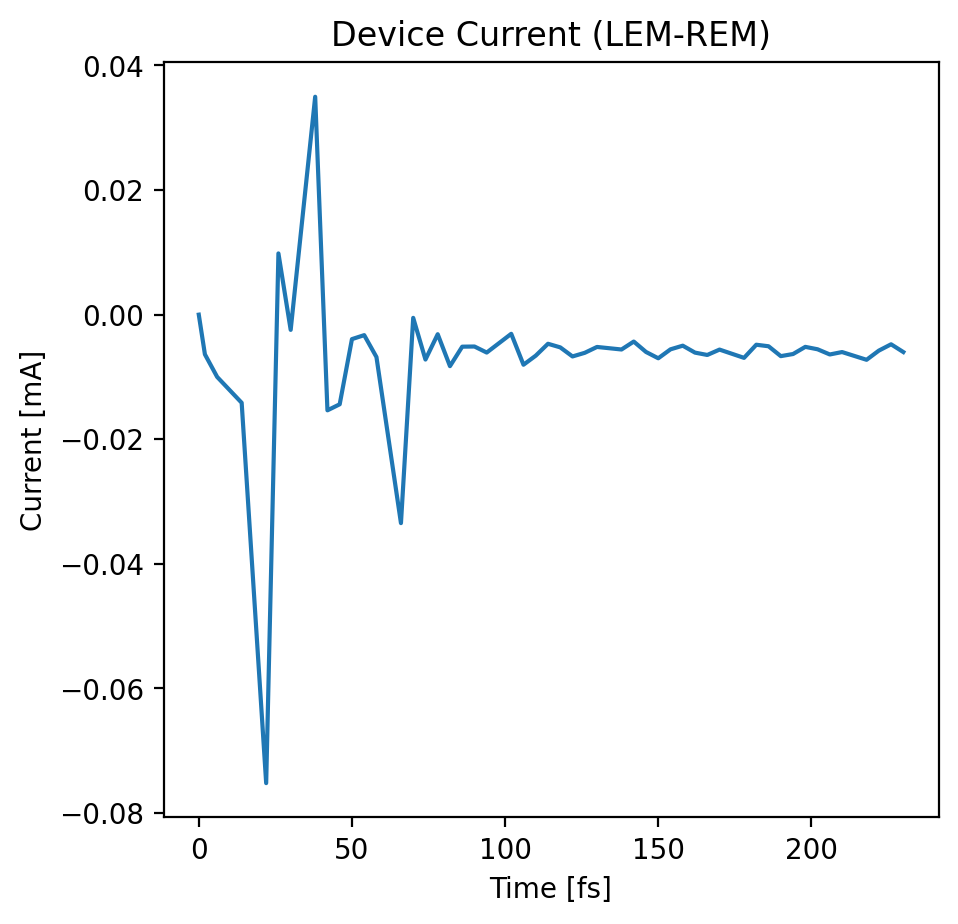

In [10]:
Gamma     = 0.000 *invfs
Delta_t   = 1 *fs
max_iters = 100
list_of_outputs=["P@S diagonal","J All Elements","J Leads Only"]
solver_type="RK4_Adaptive_Step"

solver = Solver(device,
    Gamma=Gamma, 
    Delta_t=Delta_t, 
    max_iters=max_iters, 
    list_of_outputs=list_of_outputs, 
)
outputs_dict=solver.Propagate_In_Site(solver_type=solver_type)
t_vec_in_fs=solver.t_vec_in_fs
plots_dict=solver.Visualize_Results(figsize=(5,5),dpi=200)

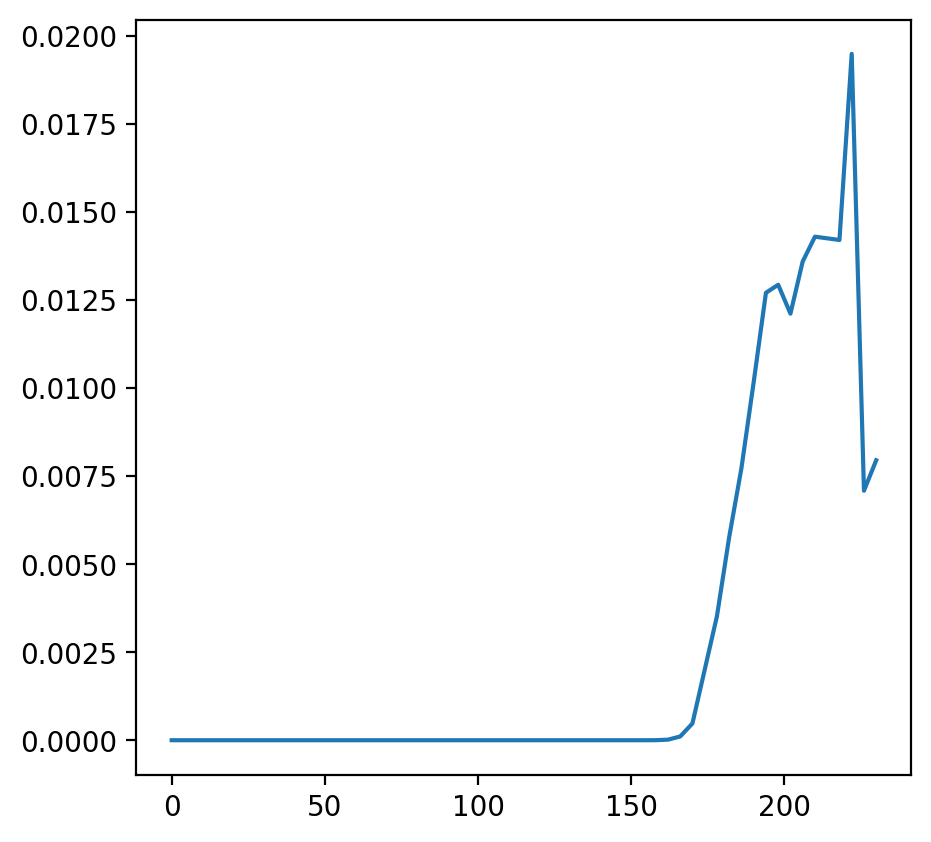

In [15]:
plt.figure(figsize=(5,5),dpi=200)
plt.plot(t_vec_in_fs,[1e3*element[int((len(element)-1)/2)] for element in outputs_dict["J All Elements"]])

In [ ]:
9->

In [12]:
outputs_dict["J All Elements"]

[array([-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
      

In [3]:
Delta_t   = 1 *fs
max_iters = 5000
max_t     = 1500*fs
list_of_outputs=["J All Elements"]
solver_type="RK4_Adaptive_Step"
Gamma_in_invfs_list=[0,]#0.001]#,0.01,0.1,1]
picklefile="OdedPlotDataRK4_NewSite_AllElements.pkl"

try:
    with open(picklefile,"rb") as f:
        RESULTS=dill.load(f)
except:
    RESULTS={}

for Gamma_in_invfs in Gamma_in_invfs_list:
    print("Starting Gamma: ",Gamma_in_invfs, " invfs")
    if Gamma_in_invfs in RESULTS.keys():
        print("Already found, continuing")
        continue
    
    Gamma=Gamma_in_invfs*invfs
    solver = Solver(device,
        Gamma=Gamma, 
        Delta_t=Delta_t, 
        max_iters=max_iters, 
        list_of_outputs=list_of_outputs, 
        max_t=max_t
    )
    outputs_dict=solver.Propagate_In_Site(solver_type=solver_type)
    RESULTS[Gamma_in_invfs]=(solver.t_vec_in_fs,outputs_dict["J All Elements"])
    
    with open(picklefile,"wb") as f:
        dill.dump(RESULTS,f)
    print()

Starting Gamma:  0  invfs
Already found, continuing


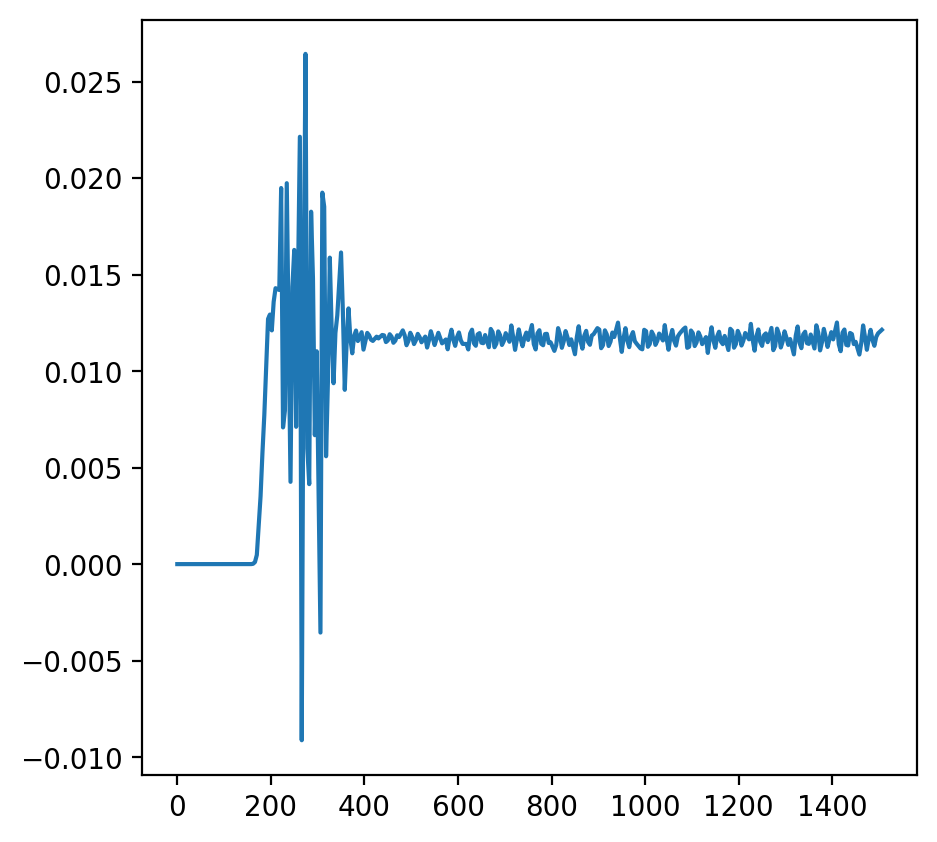

In [5]:
plt.figure(figsize=(5,5),dpi=200)
plt.plot(RESULTS[Gamma_in_invfs][0],[1e3*element[int((len(element)-1)/2)] for element in RESULTS[Gamma_in_invfs][1]])